# Сборный проект №1 Успешность игр

## Вызов библиотек

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
import re
import warnings
from scipy import stats as st
import matplotlib.lines as mlines

warnings.filterwarnings('ignore')

## Блок функций

In [2]:
def fills_good(data, main_column, function, group_columns):
    """Функция заполнения пропущенных значений

    Для использования функции необходимо передать ей
    следующие аргументы:
    
    data - массив данных, в котором необходимо заполнить пропуски;
    main_column - столбец в котором пропущены значения;
    function - значение функции, которая будет применяться при
         заполнении пустых значений в кавычках ('mean','median'...);
    group_columns - столбцы для группировки данных в виде массива [...] 
         заполнение пропусков будет производиться в соответствии
         с группировкой по указанным столбцам.
    """
    
    data[main_column] = data[main_column].fillna(data.groupby(group_columns)[main_column].transform(function))
    
def pre_research(data, column, range_min=99, range_max=99):
    """Функция предварительного анализа данных
    Данная функция выведет уникальные значения указанного
    столбца и построит гистограмму.

    Для использования функции необходимо передать ей
    следующие аргументы:
    
    data - массив данных, которые нужно анализировать;
    column - название столбца, по которому проводится анализ;
    bins_count - количество корзин в гистограмме;
    range_min, range_max - минимальное и максимальное
        граничные значения, выводимые на гистограмму
        по умолчанию задаются минимумом и максимумом значений столбца, 
        при необходимости можно внести нужные занчения для 
        масштабирования гистограммы.
    """
    
    print(f'1-й персентиль: {data[column].quantile(.1)}')
    print(f'Медиана: {data[column].quantile(.50)}')
    print(f'99-й персентиль: {data[column].quantile(.99)}')
    # В столбце есть выбросы значений, построим гистограмму для того, 
    # чтобы понять как часто встречаются большие и очень малые значения
    fig = plt.figure(figsize=(15, 6)) 
    if range_min==range_max:
        range_min = data[column].min()
        range_max = data[column].max()
    data[column].hist(bins=len(data[column].unique()),range=(range_min,range_max))
    plt.title(f"{column} histogram")
    plt.ylabel(f"{column} count")
    plt.xlabel(column)

    plt.show()
    

def print_hist(series,bins, title):
    """Функция построения гистограммы

    Для использования функции необходимо передать ей
    следующие аргументы:
    
    series - столбец данных для построения гистограммы;
    bins - количесттво корзин;
    title - название графика.
    
        Для улучшения визуализации распределения данных
    минимальное и максимальное значения для построения
    считаются по 1 и 99му персентилю
    """   
    
    fig = plt.figure(figsize=(15, 6)) 
    min_range = series.quantile(.1)
    max_range = series.quantile(.99)
    hist = plt.hist(series, bins, range = (min_range,max_range))
    grid1 = plt.grid(True)
    plt.title(title)
    plt.show()
    print(f'Среднее значение: {round(series.mean(),2)}')
    print(f'Медианное значение: {round(series.median(),2)}')
    

def print_matrix(data, sub_columns, min_size=9, max_size=9):
    """Функция построения матрицы диаграмм рассеяния

    Для использования функции необходимо передать ей
    следующие аргументы:
    
    data - массив исходных данных;
    main_column - основной столбец данных, относительно которого будет
        проводиться анализ - 'название_столбца';
    sub_columns - вспомогательные столбцы, влияние которых на
        основной столбец мы оцениваем - ['1','2','3',...];
    min_size, max_size - минимальное и максимальное значение размера
        каждой ячейки матрицы в дюймах (по умолчанию - 9 дюймов).
    """
    
    #pivot_data = data.pivot_table(index = main_column, 
    #                        values = sub_columns)
    pivot_data = data[sub_columns]
    pd.plotting.scatter_matrix(pivot_data, diagonal = 'kde',figsize=(min_size, max_size)) 

def print_scatter(data, x, y, labels, clr = "g", min_size=15, max_size=8):
    """Функция построения диаграмм рассеяния

    Для использования функции необходимо передать ей
    следующие аргументы:
    
    data - массив исходных данных;
    x, y - названия столбцов, относительно которых будет
        проводиться анализ - 'название_столбца';
    labels - массив названий диаграммы и осей - ['Заголовок','x_name','y_name'];
    clr - цвет точек;
    min_size, max_size - минимальное и максимальное значение размера
        каждой ячейки матрицы в дюймах (по умолчанию - 9 дюймов).
    """
    
    plt.figure(figsize=(min_size, max_size)) 
    plt.scatter( x, y, data=data,alpha=0.2,color=clr)
    plt.title(labels[0],fontsize=15)
    plt.xlabel(labels[1],fontsize=13)
    plt.ylabel(labels[2],fontsize=13)
    plt.grid()
    plt.show()
    
def print_plt_lines(data, categ_column, x, y, lines, labels=['','','']):
    """Функция построения нескольких линейных графиков на одних координатах

    Для использования функции необходимо передать ей
    следующие аргументы:
    
    data - массив исходных данных;
    x, y - названия столбцов, относительно которых будет
        проводиться анализ - 'название_столбца';
    lines - массив названий категориальных данных - ['name1','name2','name3'.....];
    labels - массив названий категориальных данных - ['Заголовок','x_name','y_name'];

    """
    
    fig = plt.figure(figsize=(15, 6)) 
    for i in lines:
        plot_data = data[data[categ_column]==i]
        plt.plot( 
            plot_data[x],
            plot_data[y], 
            linestyle= '-', 
#             marker='o',
            linewidth=2, 
            alpha=0.9,
            )
    plt.grid(True)
    plt.title(labels[0])
    plt.xlabel(labels[1])
    plt.ylabel(labels[2])
    plt.legend(lines)
    plt.show()

    
def lolipop_plot(data, y, x,labels, color1='orange', color2='gray', color_lim=150):
    """Функция построения Lolipop графиков:

    Для использования функции необходимо передать ей
    следующие аргументы:
    
    data - массив исходных данных;
    x, y - названия столбцов, относительно которых будет
        проводиться анализ - 'название_столбца';
    labels - массив названий категориальных данных - ['Заголовок','x_name','y_name'];
    color1 - цвет первого выделения, по умолчанию - 'orange';
    color2 - цвет второго выделения, по умолчанию - 'gray'; 
    color_lim - граница изменения цвета по оси Х, по умолчанию - 150.

    """
    
    
    data = data.sort_values(by = y)
    
    my_range=range(1,len(data.index)+1)
    my_color=np.where(data[y] > color_lim, color1, color2)
    fig = plt.figure(figsize=(15, 6)) 
    plt.hlines(y=my_range, xmin=0, xmax=data[y], color=my_color)
    plt.scatter(data[y], my_range, color=my_color, alpha=1)
    plt.yticks(my_range, data[x])
    plt.title(labels[0])
    plt.xlabel(labels[1])
    plt.ylabel(labels[2])
    plt.grid()
    plt.show()

## Изучение данных из файла

### Описание данных

    Name — название игры
    Platform — платформа
    Year_of_Release — год выпуска
    Genre — жанр игры
    NA_sales — продажи в Северной Америке (миллионы проданных копий)
    EU_sales — продажи в Европе (миллионы проданных копий)
    JP_sales — продажи в Японии (миллионы проданных копий)
    Other_sales — продажи в других странах (миллионы проданных копий)
    Critic_Score — оценка критиков (максимум 100)
    User_Score — оценка пользователей (максимум 10)
    Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

### Изучение данных

In [3]:
df = pd.read_csv('games.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Приведем названия столбцов к нижнему регистру:

In [5]:
df.columns = df.columns.str.lower()

In [6]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [7]:
for i in df.columns:
    print(f"Уникальные значения в столбце {df[i].name}: \n {df[i].unique()} \n")


Уникальные значения в столбце name: 
 ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica'] 

Уникальные значения в столбце platform: 
 ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX'] 

Уникальные значения в столбце year_of_release: 
 [2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.] 

Уникальные значения в столбце genre: 
 ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan] 

Уникальные значения в столбце na_sales: 
 [4.136e+01 2.908e+01 1.568e+01 1.561e+01 1.127e+01 2.320e+01 1.128e+01
 1.396e+01 1.444e+

### Вывод

На этапе предобработки данных необходимо провести следующие изменения:

| Столбец        | Замена типа           | Пропуски  |
| ------------- |:-------------:| -----:|
|  name     | не требуется | удалить строки |
| platform	 | не требуется    |    не требуется |
| year_of_release	 | int    |   замена медианой по платформе? |
| genre	 | не требуется    |    удалить строки |
| na_sales	 | не требуется    |    не требуется |
| eu_sales	 | не требуется    |    не требуется |
| jp_sales	 | не требуется    |    не требуется |
| other_sales	 | не требуется    |    не требуется |
| critic_score	 | не требуется    |    не требуется |
| user_score	 | float    |    не требуется |
| rating	 | не требуется    |    заполнить "no_rate" |

## Предобработка данных

In [8]:
df = df.dropna(subset=['name'])

In [9]:
fills_good(df, 'year_of_release', 'median', 'platform')
df['year_of_release'] = df['year_of_release'].astype('int')

1-й персентиль: 1999.0
Медиана: 2007.0
99-й персентиль: 2016.0


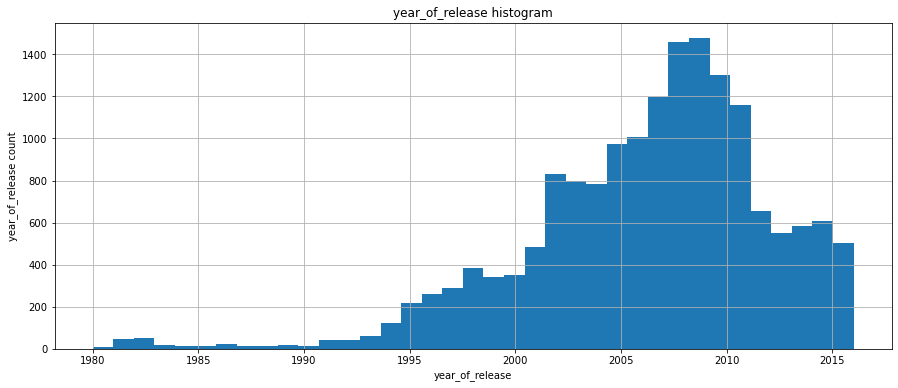

In [10]:
pre_research(df, 'year_of_release')

В 2007 - 2010 годах виден заметрый всплеск в рынке геймдева

1-й персентиль: 0.0
Медиана: 0.08
99-й персентиль: 2.79


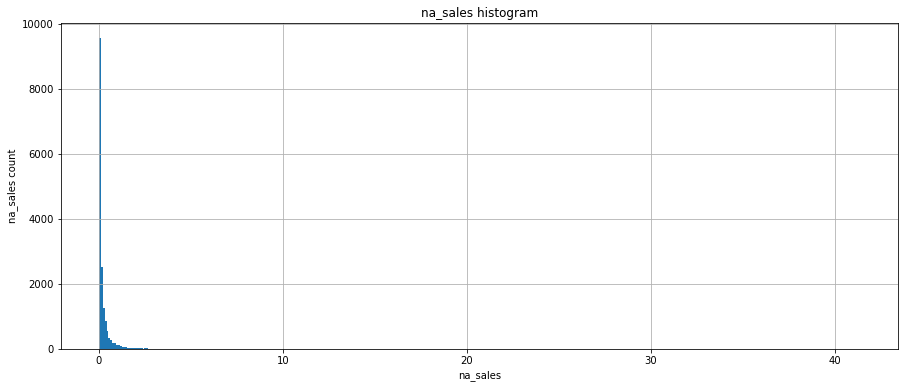

In [11]:
pre_research(df, 'na_sales')

Посмотрим, какие игры выбиваются за 999-й персентиль

In [12]:
df.loc[df['na_sales'] > df['na_sales'].quantile(.999)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Никакх выбросов, все игры - реальные мастодонты рынка.

1-й персентиль: 0.0
Медиана: 0.02
99-й персентиль: 1.93880000000001


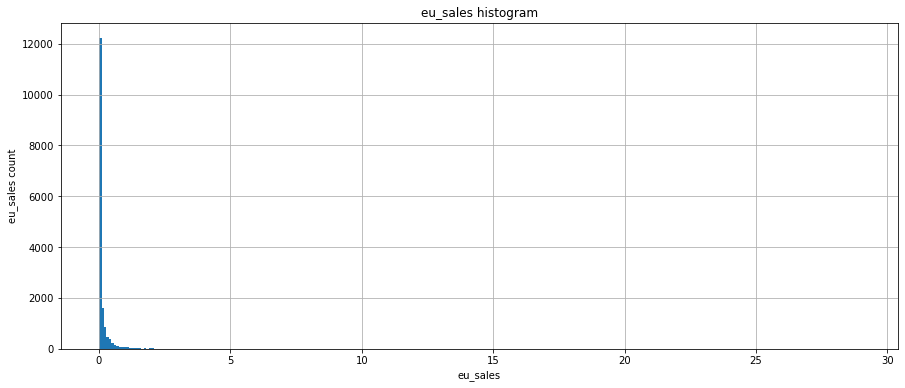

In [13]:
pre_research(df, 'eu_sales')

1-й персентиль: 0.0
Медиана: 0.0
99-й персентиль: 1.2688000000000104


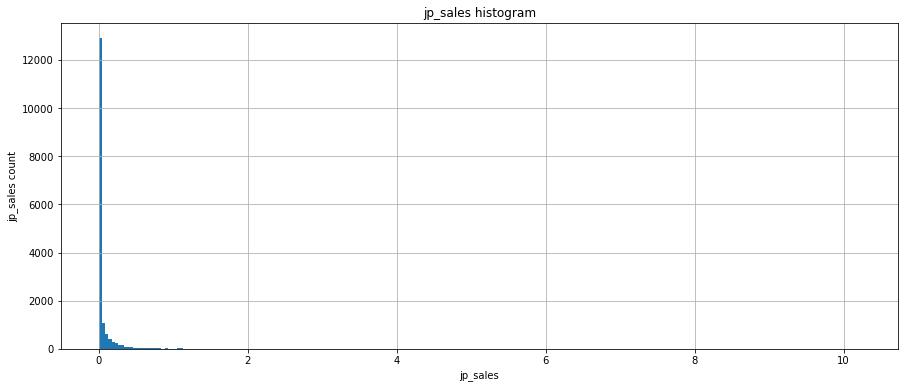

In [14]:
pre_research(df, 'jp_sales')

1-й персентиль: 0.0
Медиана: 0.01
99-й персентиль: 0.63


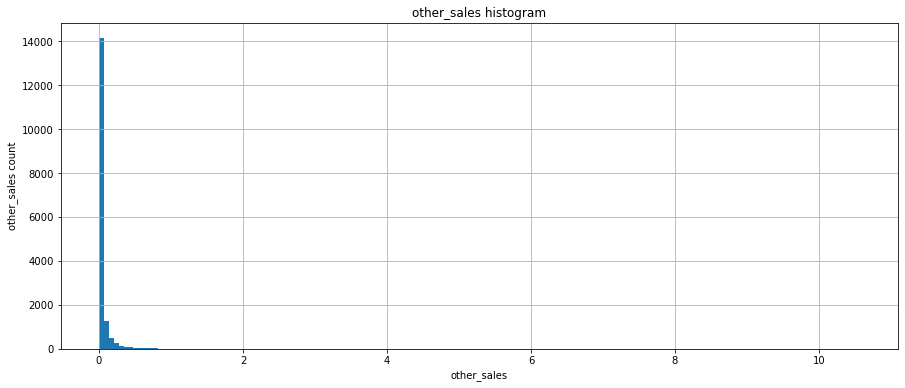

In [15]:
pre_research(df, 'other_sales')

1-й персентиль: 50.0
Медиана: 71.0
99-й персентиль: 94.0


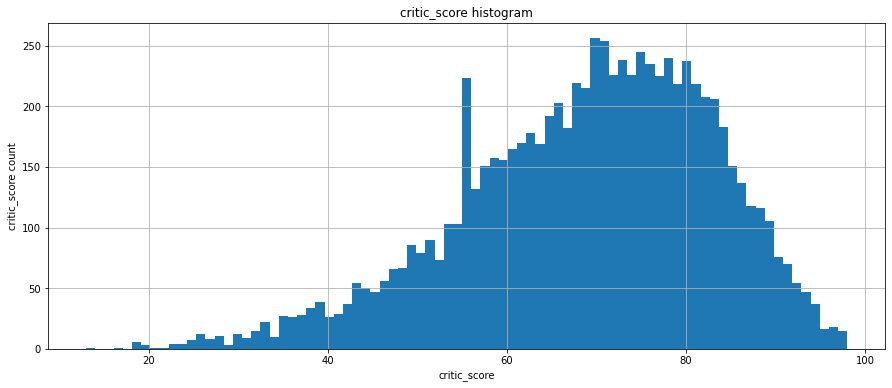

In [16]:
pre_research(df, 'critic_score')

В данных столбца 'user_score' есть значения tbd, в соответствии с сайтом metacritic tbd - это недостаточное количество оценок (ниже 4х), поэтому эти значения в столбце заменим на NaN

In [17]:
df.loc[df['user_score']=='tbd','user_score'] = np.nan
df['user_score'] = df['user_score'].astype('float')

# Приведем оценки пользователей к той же шкале, которая у оценок критиков

df['user_score'] = df['user_score']*10

1-й персентиль: 51.0
Медиана: 75.0
99-й персентиль: 92.0


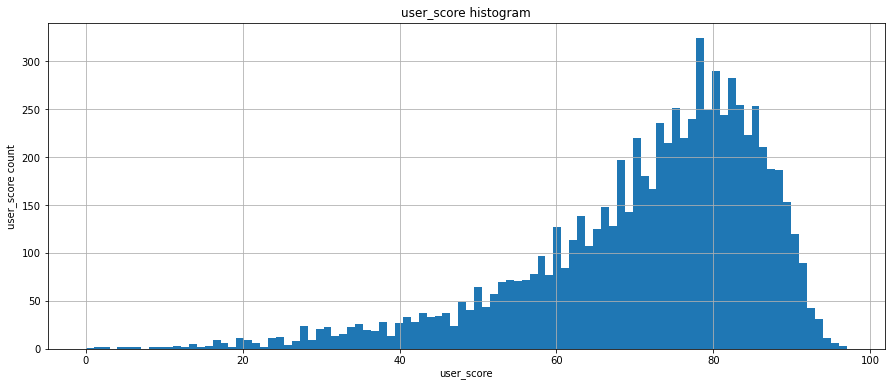

In [18]:
pre_research(df, 'user_score')

In [19]:
df['rating'] = df['rating'].fillna('no_rate')

In [20]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rate
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rate
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_rate
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,no_rate
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rate
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,no_rate


In [21]:
df['sum_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [22]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rate,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rate,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_rate,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,no_rate,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rate,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,no_rate,0.01


### Вывод

* На этапе предобработки данных были замечены значительные выбросы данных в столбцах количества проданных копий, но мы не стали избавляться от этих данных, так как они реальны и имеют важное значение в выборе товаров для заказчика.
* Пропуски в столбцах с оценками критиков и пользователей не заполнялись никакими значениями, потому что если заполнить их средними или медианными, то мы получим некорректную статистику при соотношении пользовательских оценок и продаж игр, ведь мы можем оценить средне как плохую игру так и очень хорошую, но оценок которой просто не было в выборке.
* В графе года выпуска игры пропуски были заменены на медианные значения в соответствии с платформой


## Исследовательский анализ данных

Рассмотрим сколько игр выпускалось в разные годы. 

1-й персентиль: 1999.0
Медиана: 2007.0
99-й персентиль: 2016.0


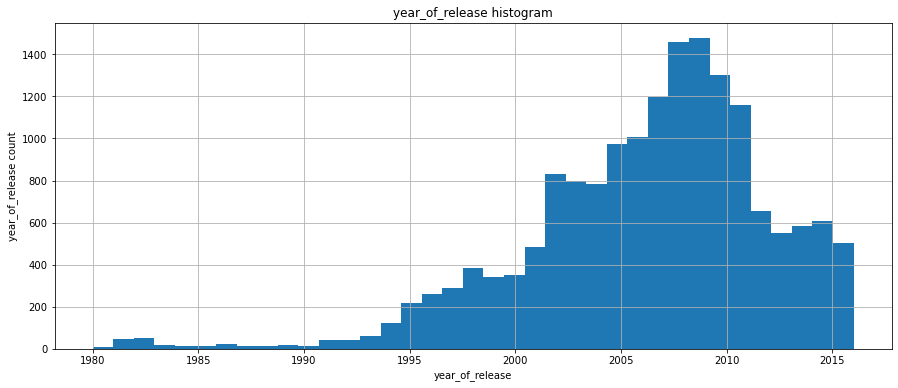

year_of_release
1980       9
1981      46
1982      53
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     290
1998     386
1999     341
2000     350
2001     482
2002     829
2003     800
2004     783
2005     973
2006    1006
2007    1197
2008    1457
2009    1476
2010    1302
2011    1161
2012     653
2013     552
2014     582
2015     606
2016     502
Name: year_of_release, dtype: int64

In [23]:
pre_research(df, 'year_of_release')
df.groupby('year_of_release')['year_of_release'].count()


Не будем учитывать в исследовании данные нижу 1995 года, в это время произошел первый заметный рост игровой индустрии, который скорее всего связан с широким распространением CD-дисков и консолей

In [24]:
df = df.query('year_of_release >= 1995').copy()

Посмотрим, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [25]:
df_sales_by_year = df.pivot_table(index = ['year_of_release',
                                           'platform'], 
                                  values = 'sum_sales', 
                                  aggfunc = 'sum').reset_index()
df_sales_by_year


,year_of_release,platform,sum_sales
0,1995,3DO,0.08
1,1995,GB,3.60
2,1995,NG,0.33
3,1995,PC,4.22
4,1995,PS,35.96
...,...,...,...
182,2016,PSV,4.25
183,2016,Wii,0.18
184,2016,WiiU,4.60
185,2016,X360,1.52


Расчитаем время жизни разныч игровыч платформ

In [26]:
df_sales_by_year.groupby('platform')['platform'].count().sort_values(ascending = False)

platform
PC      22
PS2     12
X360    12
PSP     12
Wii     11
PS3     11
DS      10
PS       9
XB       9
GBA      8
GB       7
N64      7
GC       7
DC       7
3DS      6
PSV      6
SAT      5
SNES     5
WiiU     5
XOne     4
PS4      4
WS       3
NG       2
PCFX     1
TG16     1
3DO      1
Name: platform, dtype: int64

In [27]:
df_sales_by_year.groupby('platform')['sum_sales'].sum().sort_values(ascending = False)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.10
PS       724.83
GBA      317.85
PS4      314.14
PSP      294.05
3DS      259.00
XB       257.74
PC       243.55
N64      218.68
GC       198.93
XOne     159.32
GB       140.93
WiiU      82.19
PSV       54.07
SNES      49.59
SAT       29.94
DC        15.95
WS         1.42
NG         0.43
TG16       0.16
3DO        0.08
PCFX       0.03
Name: sum_sales, dtype: float64

-------------
Построим различные графики, для визуализации и сравнения показателей разных платформ

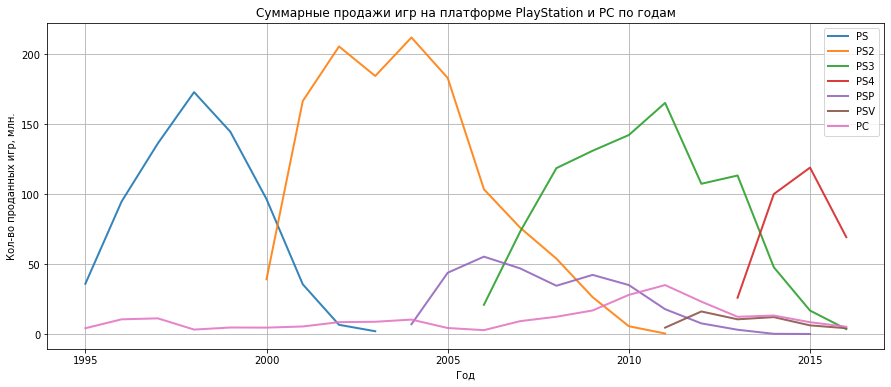

In [28]:
labels = ['Суммарные продажи игр на платформе PlayStation и PC по годам',
          'Год',
          'Кол-во проданных игр, млн.',
          ]
print_plt_lines(df_sales_by_year, 
                'platform', 
                'year_of_release', 
                'sum_sales', 
                ['PS', 
                 'PS2', 
                 'PS3', 
                 'PS4', 
                 'PSP',
                 'PSV',
                 'PC',],
               labels)

Из графика видно, что предыдущее поколение приставок PS поддерживается от 4 до 6 лет

Пик количества проданных копий игр на данной платформе = 2001-2005 годы, как раз через год, после выхода ps2, когда производители видеоигр полноценно начали осваивать новое железо, в эти годы вышли продолжения уже культовых тайтлов с ps1, а так же новые игры, которые в дальнейшем получали продолжения на новых поколениях консолей

PSP и PSVita - портативные консоли, не удивительно, что графики продаж этих консолей ниже остальных графиков

PS Vita - самая провальная консоль Sony

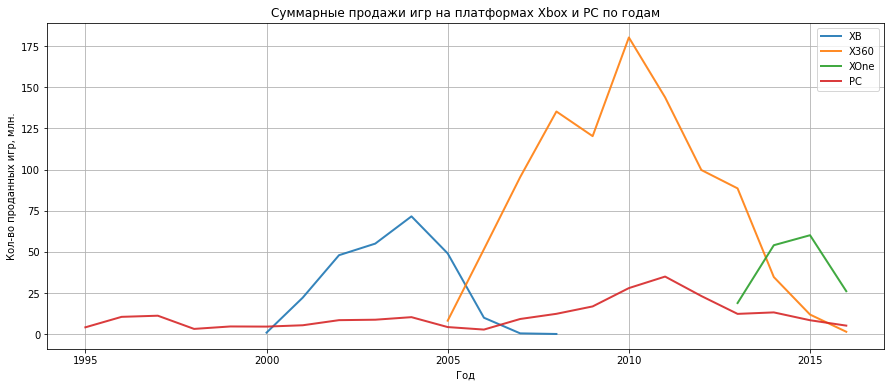

In [29]:
labels = ['Суммарные продажи игр на платформах Xbox и PC по годам',
          'Год',
          'Кол-во проданных игр, млн.',
          ]
print_plt_lines(df_sales_by_year, 
                'platform', 
                'year_of_release', 
                'sum_sales', 
                [ 'XB', 
                 'X360',
                 'XOne',
                 'PC',
                ],
               labels)

Компания Microsoft вошла на рынок видеоигровой индустрии в 2000 году с конкурентом консоли Playstation 2 в видео Xbox.

Из графиков можно сделать вывод о коллосальном успехе в плане продажи игр консоли Xbox 360 по сравнению с предшествующей консолью, судить о продажах на новой для 2014 года консоли Xbox One пока рано, но динамика первых лет продаж не радует.

Консоли Xbox поддерживаются в течение 4х лет после выпуска новой версии

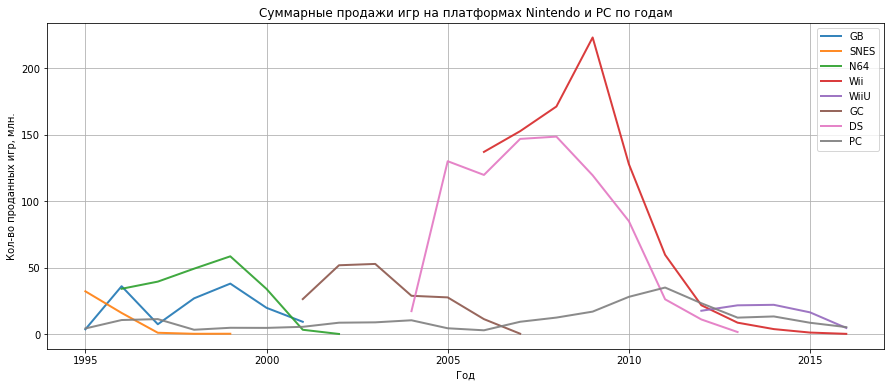

In [30]:
labels = ['Суммарные продажи игр на платформах Nintendo и PC по годам',
          'Год',
          'Кол-во проданных игр, млн.',
          ]
print_plt_lines(df_sales_by_year, 
                'platform', 
                'year_of_release', 
                'sum_sales', 
                [ 'GB', 
                 'SNES',
                 'N64',
                 'Wii',
                 'WiiU',
                 'GC',
                 'DS','PC',
                ],
               labels)

Консоли Nintendo явно отличаются от Xbox и PS, они еще до 1995 года выпускали игрровые консоли и заняли свою нишу рынка с эксклюзивными игровыми сериями, которые любях фанаты данной компании.

Так же мы видим, что цикличность производства консолей Nintendo сильно отличается от конкурентов и цикл жизни каждой консоли данной компании уникален

Стоит отметить, что консоль Nintendo DS - это портативная консоль, учитывать ее стоит только в сравнении с остальными портативными консолями, так как большинство тайтлов для данного типа устройств выходят по собственным ценам и являются эксклюзивными.

Сравним продажи игр на стационарных консолях Nintendo, Xbox и PS, а так же на PC.

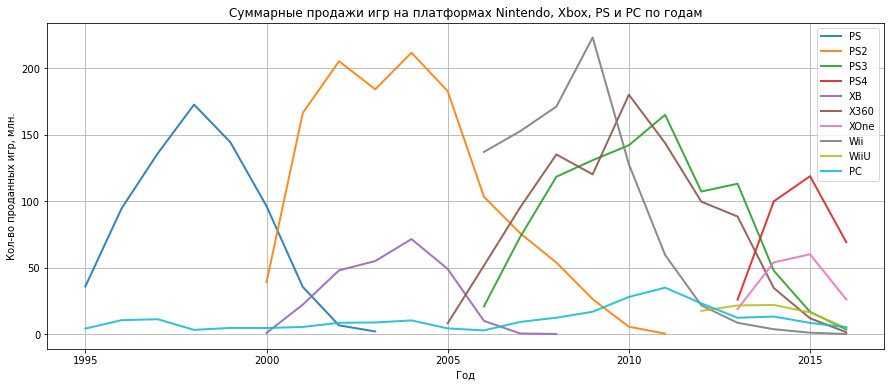

In [31]:
labels = ['Суммарные продажи игр на платформах Nintendo, Xbox, PS и PC по годам',
          'Год',
          'Кол-во проданных игр, млн.',
          ]
print_plt_lines(df_sales_by_year, 
                'platform', 
                'year_of_release', 
                'sum_sales', 
                [ 'PS', 
                 'PS2', 
                 'PS3', 
                 'PS4', 
                 'XB', 
                 'X360',
                 'XOne',
                 'Wii',
                 'WiiU',
                 'PC',
                ],
               labels)

в 2005-2010 году консоль Xbox 360 явно опережала своего конкурента в плане продаж игр, это связано с тем, что компания Microsoft выпустила свою консоль на год раньше и стоимость консоли была ниже, чем стоимость PS3. 

Так же в стартовой линейке игр для PS3 было мало хороших тайтлов, а в консоли Xbox360 были как новые игры, так и совместимость с старыми играми и дисками.

К 2010 году компания Sony уже успела выпустить достаточное количество эксклюзивных игр, что позволило опередить конкурентов по продажам игр на консоли.

Если сравнивать графики продаж игр на новом поколении консолей - явно видно, что консоль PlayStation 4 в 2 раза опережает по продажам консоль Xbox One в 2014-2016 годах (даже рпи условии неполных данных за 2016 год)

Персональные компьютеры на протяжении всех лет отстают в плане продаж игр, скорее всего это связано с легкостью пиратства на данном типе устройств

----------------------
Из рассмотренных данных мы можем определить актуальный период для исследования.

Мы будем рассматривать рынок видеоигр в соответствии с прошлым и текущим поколением консолей, т.е. с 2004 года, а так же ограничим выбор данных 

Разделим наши данные на 2 категории: стационарные и портативные консоли

Стационарные: 'PS3', 'PS4', 'X360','XOne', 'Wii', 'WiiU', а так же 'PC'

Портативные:  'DS', 'PSP', 'PSV'


Выделим соответствующие графики в таблице и установим отметку о портативности консолей для удобства

In [32]:
df_sales_by_year = df_sales_by_year.query('(year_of_release >=2004)&(platform in ["PS3","PS4", "X360","XOne", "Wii", "WiiU", "PC","DS", "PSP", "PSV"])')

In [33]:
df_sales_by_year['portable'] = 0
df_sales_by_year.loc[df_sales_by_year['platform'].apply(lambda x:x in [ 'DS', 'PSP', 'PSV']), 'portable'] = 1

Построим график для стационарных консолей

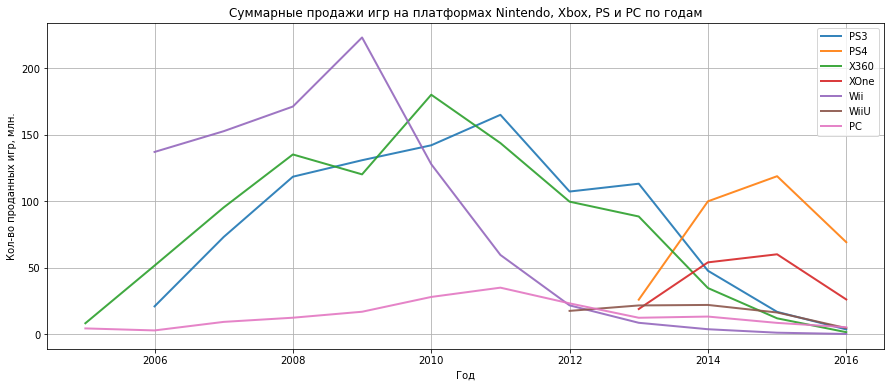

In [34]:
labels = ['Суммарные продажи игр на платформах Nintendo, Xbox, PS и PC по годам',
          'Год',
          'Кол-во проданных игр, млн.',
          ]
print_plt_lines(df_sales_by_year.query('year_of_release >=2005'), 
                'platform', 
                'year_of_release', 
                'sum_sales', 
                [ 'PS3', 'PS4', 'X360','XOne', 'Wii', 'WiiU', 'PC',
                ],
               labels)

Построим график для портативных консолей

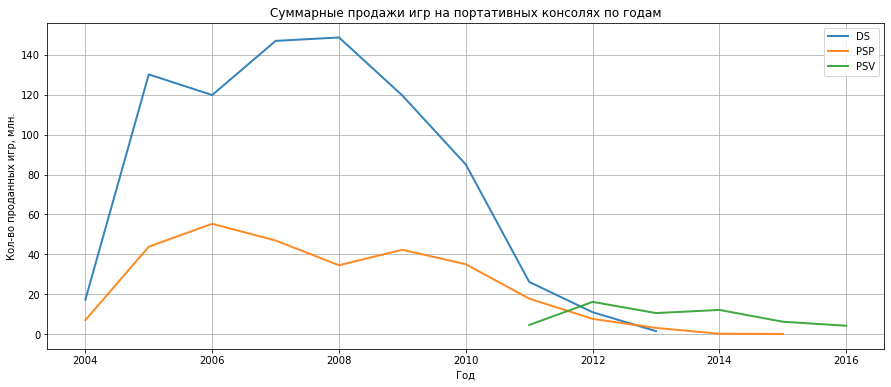

In [35]:
labels = ['Суммарные продажи игр на портативных консолях по годам',
          'Год',
          'Кол-во проданных игр, млн.',
          ]
print_plt_lines(df_sales_by_year, 
                'platform', 
                'year_of_release', 
                'sum_sales', 
                [ 'DS', 'PSP', 'PSV',
                ],
               labels)

Рассмотрим суммарные продажи по каждому игровому устройству за весь рассматриваемый период жизни

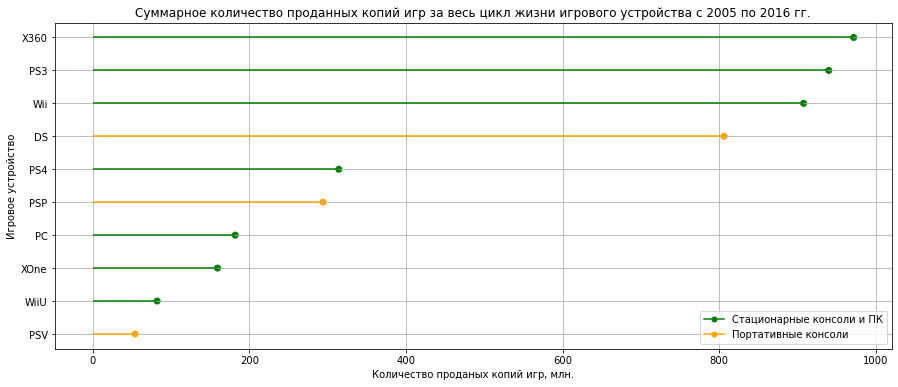

In [36]:
df_lolipop = df_sales_by_year.pivot_table(index = 'platform', 
                                          values = 'sum_sales', 
                                          aggfunc = 'sum').reset_index().sort_values(by = 'sum_sales')
df_lolipop['portable'] = 0
df_lolipop.loc[df_lolipop['platform'].apply(lambda x:x in [ 'DS', 'PSP', 'PSV']), 'portable'] = 1

my_range=range(1,len(df_lolipop.index)+1)
my_color=np.where(df_lolipop ['portable'] == 1, 'orange', 'green')
fig = plt.figure(figsize=(15, 6)) 
plt.hlines(y=my_range, xmin=0, xmax=df_lolipop['sum_sales'], color=my_color)
plt.scatter(df_lolipop['sum_sales'], my_range, color=my_color, alpha=1)
 

plt.yticks(my_range, df_lolipop['platform'])
plt.title("Суммарное количество проданных копий игр за весь цикл жизни игрового устройства с 2005 по 2016 гг.")
plt.xlabel('Количество проданых копий игр, млн.')
plt.ylabel('Игровое устройство')
plt.grid()

# Делаем легенду вручную, введем обозначения для линий

orange_line = mlines.Line2D([], [], color='orange', marker='o',
                          markersize=5, label='Портативные консоли')
green_line = mlines.Line2D([], [], color='green', marker='o',
                          markersize=5, label='Стационарные консоли и ПК')
plt.legend(handles=[green_line,orange_line],loc=4)
plt.show()

Из графика суммарных продаж игр на всех игравых устройствах видно, что в предыдущем поколении с небольшим отрывом лидирует  Xbox 360, с небольши отставанием на 2 и 3 месте расположились консоли PS3 и Wii

Среди портативных консолей заметно тотальное доминирование Nintendo DS, на PSP за тот же период времени продали более чем в 2 раза меньшее количество игр, PS Vita отстает от всех игровых устройств.

В новом же поколении косолей на данный момент лидирует PS4, вдвое опережая своего конкурента в лице Xbox One, WiiU так же является отстающей консолью, игры для нее не пользуются спросом по всему миру.



Построим графики "Ящик с усами" для исследуемых видов консолей, для этого выделим их из нашей основной таблицы с данными

In [37]:
stations = ['PS3', 'PS4', 'X360','XOne', 'Wii', 'WiiU', 'PC']
portable = ['DS', 'PSP', 'PSV']
all_platforms = stations + portable
past_gen = ['Wii', 'PS3', 'X360']
next_gen = ['WiiU', 'PS4', 'XOne']

In [38]:
main_df = df[df['platform'].apply(lambda x: x in all_platforms) ]
main_df['portable'] = 0
main_df.loc[main_df['platform'].apply(lambda x:x in [ 'DS', 'PSP', 'PSV']), 'portable'] = 1

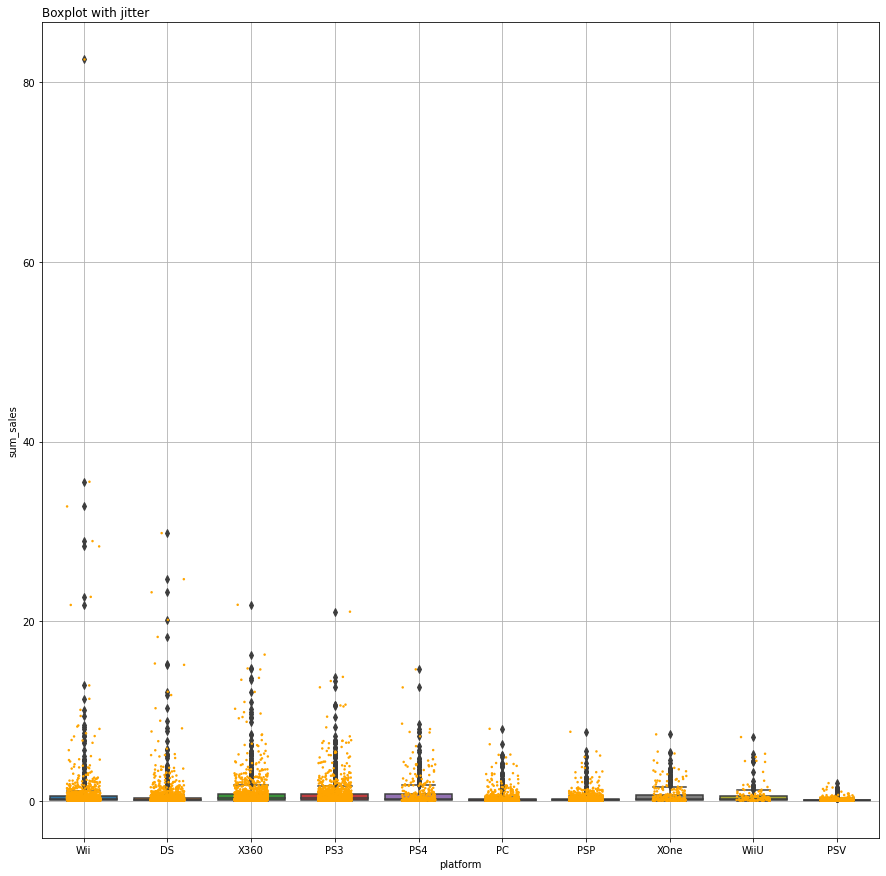

In [39]:
fig = plt.figure(figsize=(15, 15)) 
ax = sns.boxplot(x='platform', y='sum_sales', data=main_df)
ax = sns.stripplot(x='platform', y='sum_sales', data=main_df, color="orange", jitter=0.2, size=2.5)
plt.title("Boxplot with jitter", loc="left")
plt.grid()
plt.show()

У консоли Wii есть какая-то игра, которая продавалась тиражом более 80 млн. копий, отсечем это значение при построении графиков, однако будем учитывать, что этот тайтл нельзя игнорировать при планирвоании стратегии нельзя, он очень популярен, посмотрим, что это за игра



In [40]:
mega_title = main_df.query('sum_sales > 40')
mega_title

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales,portable
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54,0


Wii Sport был так называемым систем селлером, он задействовал все технологические возможности новых контроллеров консоли Wii, что вызвало бум продаж этого тайтла и консолей соответсвенно

Построим ящики с усами для ралзличных типов консолей:

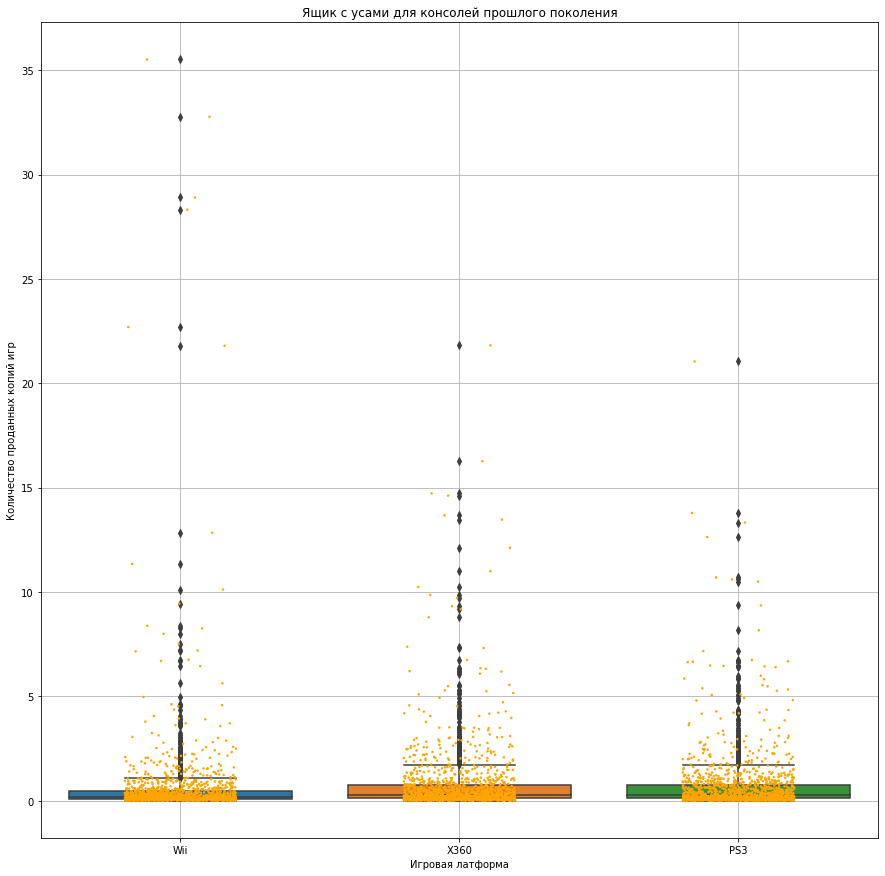

In [41]:
main_df_pg = main_df.query('sum_sales < 40')[main_df['platform'].apply(lambda x: x in past_gen)]

fig = plt.figure(figsize=(15, 15)) 
ax = sns.boxplot(x='platform', y='sum_sales', data=main_df_pg)
ax = sns.stripplot(x='platform', y='sum_sales', data=main_df_pg, color="orange", jitter=0.2, size=2.5)
plt.title("Ящик с усами для консолей прошлого поколения")
plt.xlabel('Игровая латформа')
plt.ylabel('Количество проданных копий игр')
plt.grid()
plt.show()

Из графика можно сделать вывод, что большая часть игр продается в количестве до 3х миллионов копий, ограничим количество проданных копий на графике, чтобы подробнее расмотреть распределение

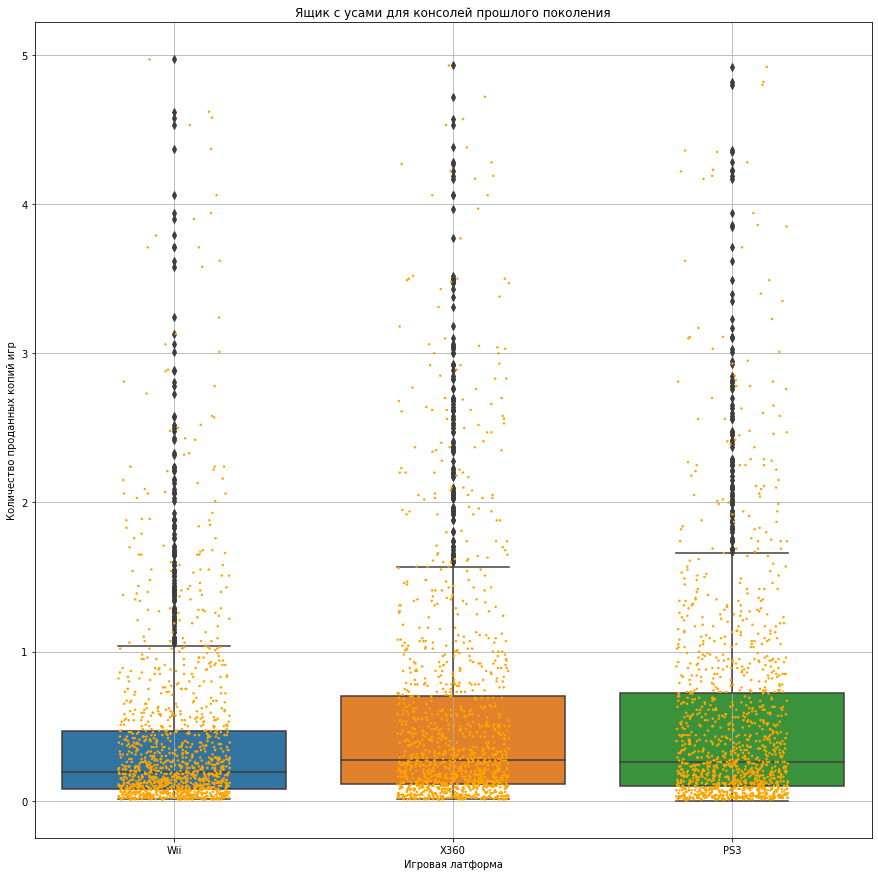

In [42]:
main_df_pg = main_df.query('sum_sales < 5')[main_df['platform'].apply(lambda x: x in past_gen)]

fig = plt.figure(figsize=(15, 15)) 
ax = sns.boxplot(x='platform', y='sum_sales', data=main_df_pg)
ax = sns.stripplot(x='platform', y='sum_sales', data=main_df_pg, color="orange", jitter=0.2, size=2.5)
plt.title("Ящик с усами для консолей прошлого поколения")
plt.xlabel('Игровая латформа')
plt.ylabel('Количество проданных копий игр')
plt.grid()
plt.show()

Можно сделать вывод, что на консолях Wii график распределения более сжат по вертикали, это означает, что бОльшая часть проданных игр продается до 1млн копий, в случаей Xbox 360 и PS3 мы видим, что разброс в продажах у них более распределен по вертикали, это связано с тем, что по сравнению с Wii на рассматриваемых консолях помимо эксклюзивных игр хорошо продаются и мультиплатформенные игры, которых попросту нет на Wii

Построим те же графики для нового поколения консолей:

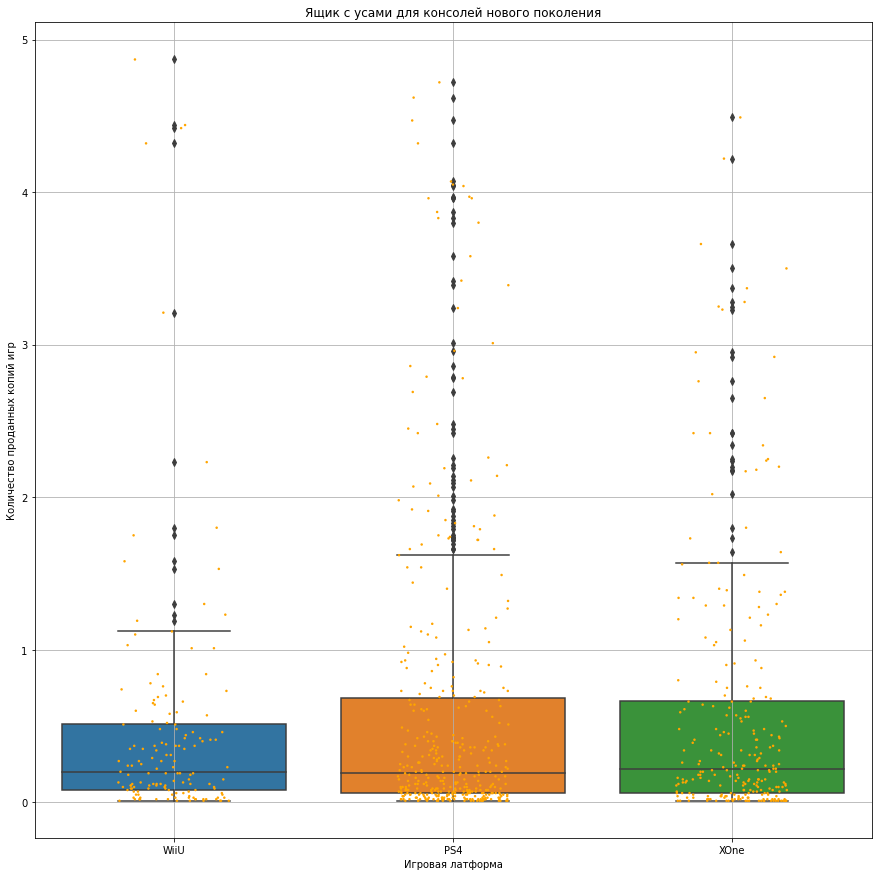

In [43]:
main_df_ng = main_df.query('sum_sales < 5')[main_df['platform'].apply(lambda x: x in next_gen)]

fig = plt.figure(figsize=(15, 15)) 
ax = sns.boxplot(x='platform', y='sum_sales', data=main_df_ng)
ax = sns.stripplot(x='platform', y='sum_sales', data=main_df_ng, color="orange", jitter=0.2, size=2.5)
plt.title("Ящик с усами для консолей нового поколения")
plt.xlabel('Игровая латформа')
plt.ylabel('Количество проданных копий игр')
plt.grid()
plt.show()

Картина та же самая, чуть больше продаются игры для PS4, чуть хуже для Xbox One и для WiiU игры продаются сильно хуже и даже визуально видно насколько меньше игр разрабатывается для этой платформы (оранжевые точки на графике).

В отличие от своей предшественницы WiiU не имеет в своем арсенале тайтла, который бы продавал эту консоль и имел заоблачные продажи, скорее всего это просчет компании Nintendo.

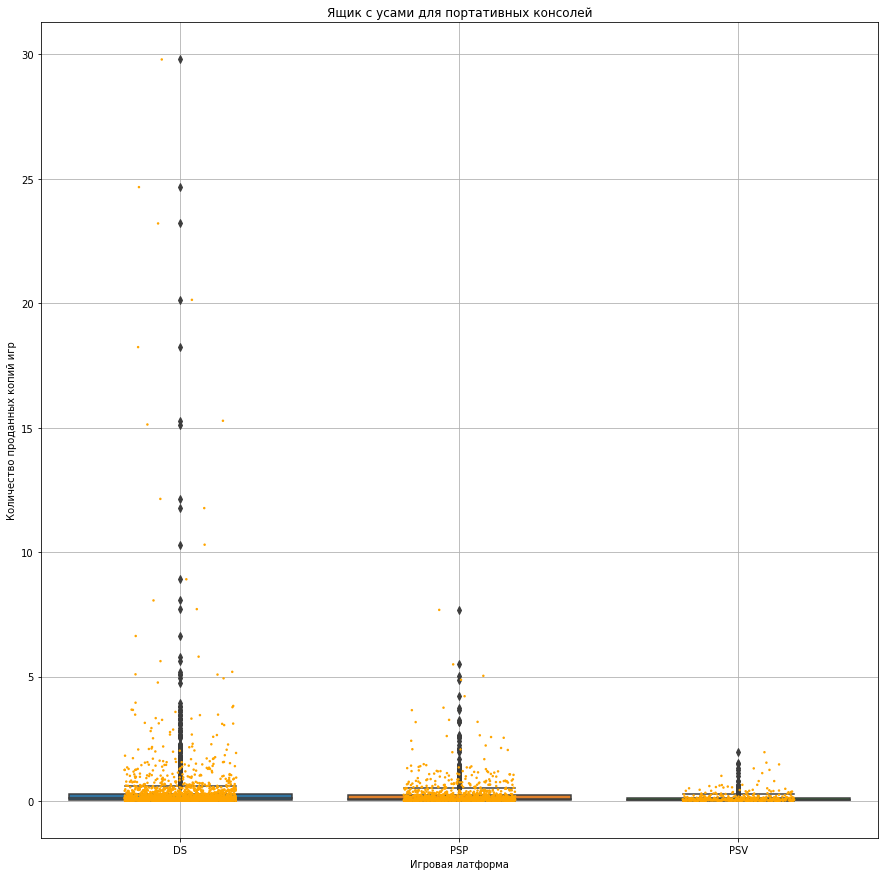

In [44]:
main_df_port = main_df.query('sum_sales < 40')[main_df['platform'].apply(lambda x: x in portable)]

fig = plt.figure(figsize=(15, 15)) 
ax = sns.boxplot(x='platform', y='sum_sales', data=main_df_port)
ax = sns.stripplot(x='platform', y='sum_sales', data=main_df_port, color="orange", jitter=0.2, size=2.5)
plt.title("Ящик с усами для портативных консолей")
plt.xlabel('Игровая латформа')
plt.ylabel('Количество проданных копий игр')
plt.grid()
plt.show()

У консоли Nintendo DS очень много игр, которые продались тиражем более 5 млн. копий, в то время как у обеих консолей компании Sony таких игр почти нет

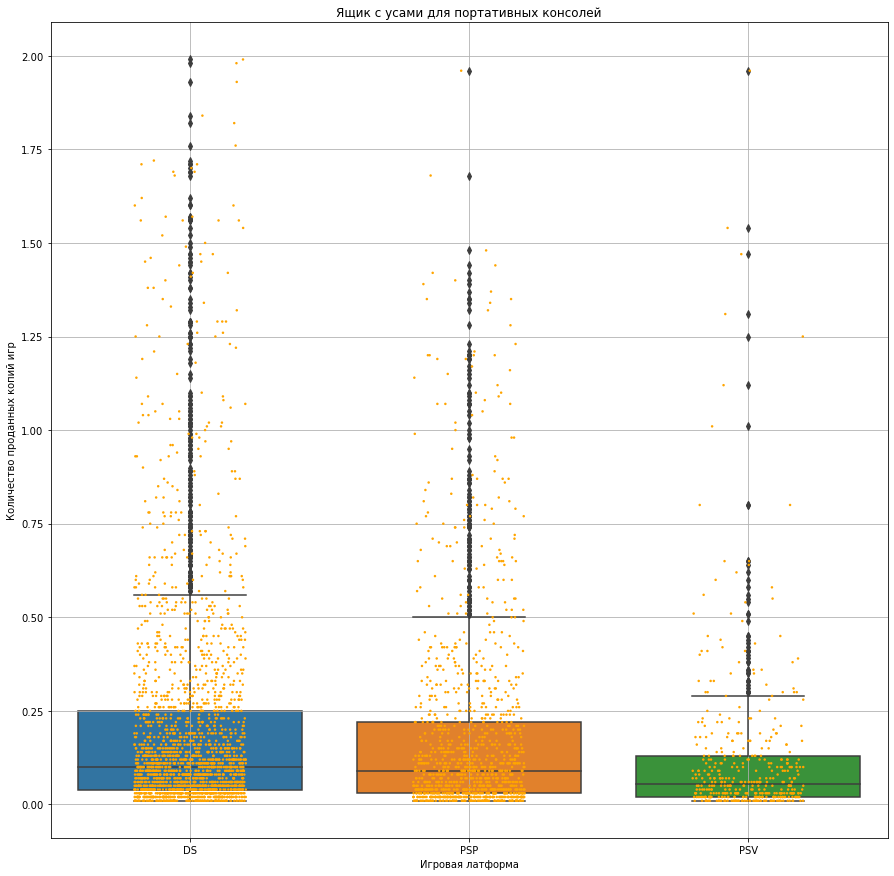

In [45]:
main_df_port = main_df.query('sum_sales < 2')[main_df['platform'].apply(lambda x: x in portable)]

fig = plt.figure(figsize=(15, 15)) 
ax = sns.boxplot(x='platform', y='sum_sales', data=main_df_port)
ax = sns.stripplot(x='platform', y='sum_sales', data=main_df_port, color="orange", jitter=0.2, size=2.5)
plt.title("Ящик с усами для портативных консолей")
plt.xlabel('Игровая латформа')
plt.ylabel('Количество проданных копий игр')
plt.grid()
plt.show()

Если не учитывать большие тайтлы Nintendo DS, иможно сказать, что в среднем платформа PSP была почти так же популярна, как и Nintendo DS

Консоль PS Vita можно считать провальной.

--------------------

Рассмотрим влияние отзывов критиков и пользователей на продажи игр для различных платформ, будем рассматривать стационарные консоли прошлого поколения:

Построим матрицы диаграмм рассеяния

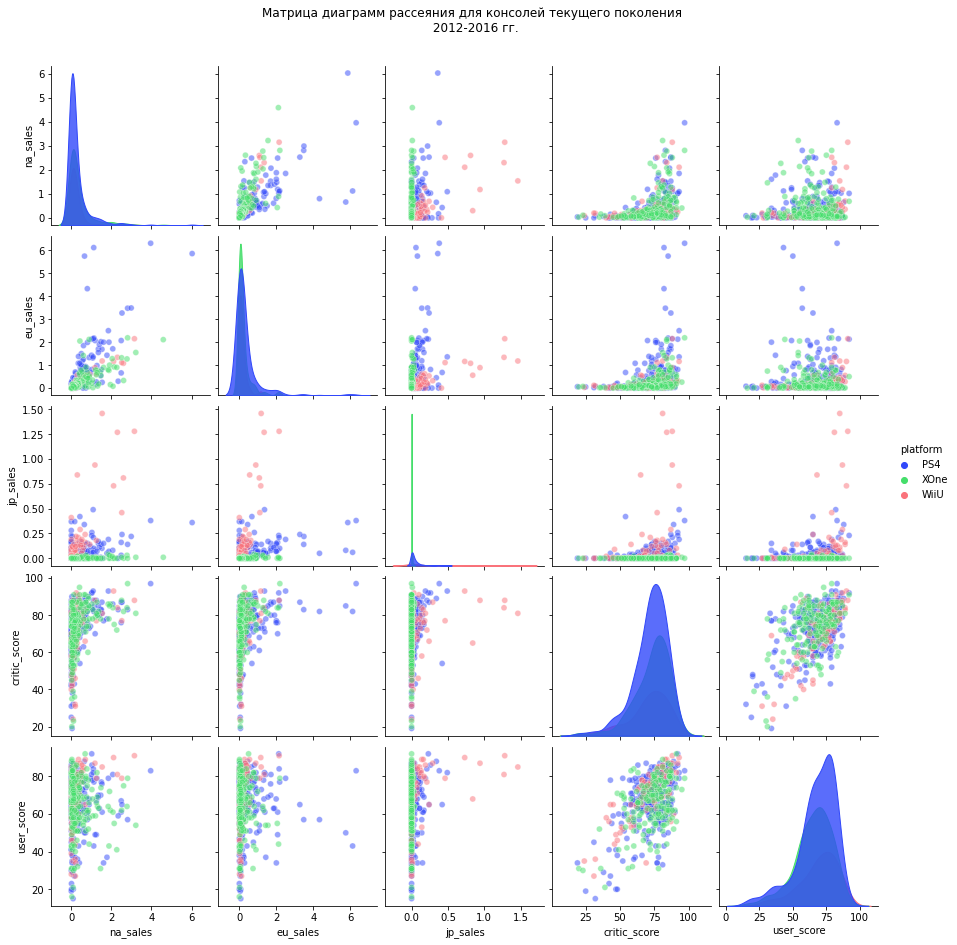

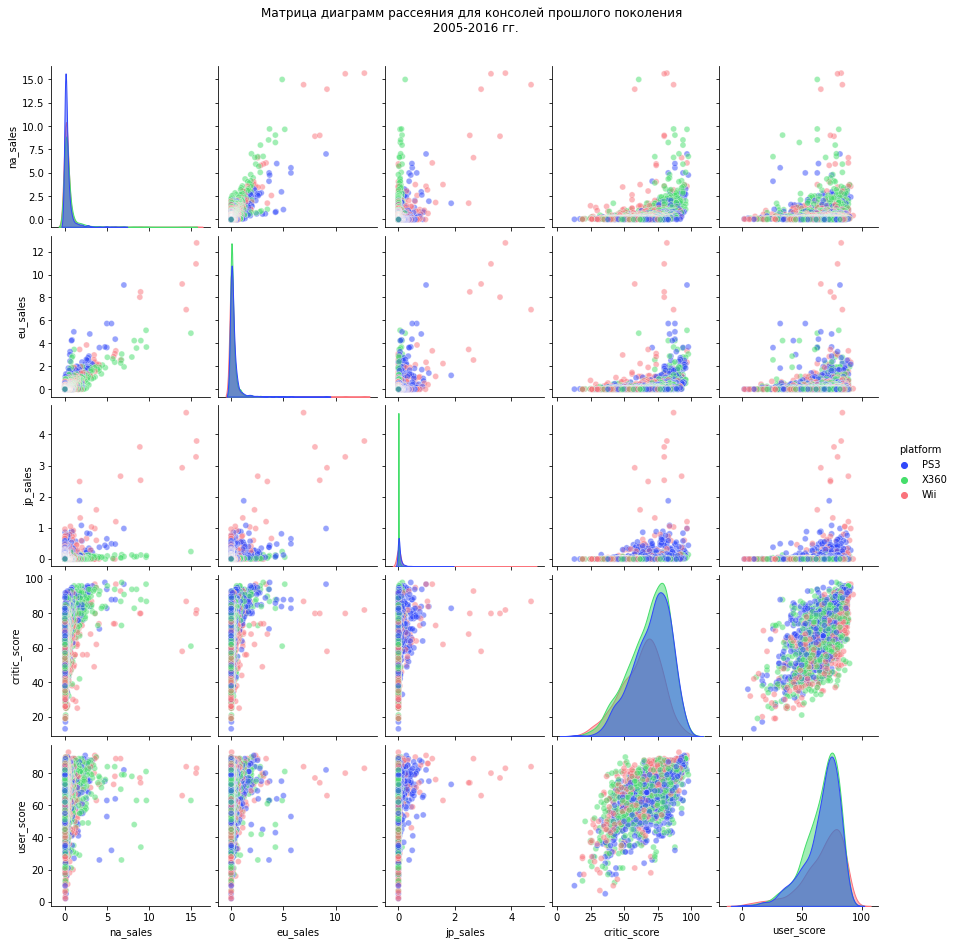

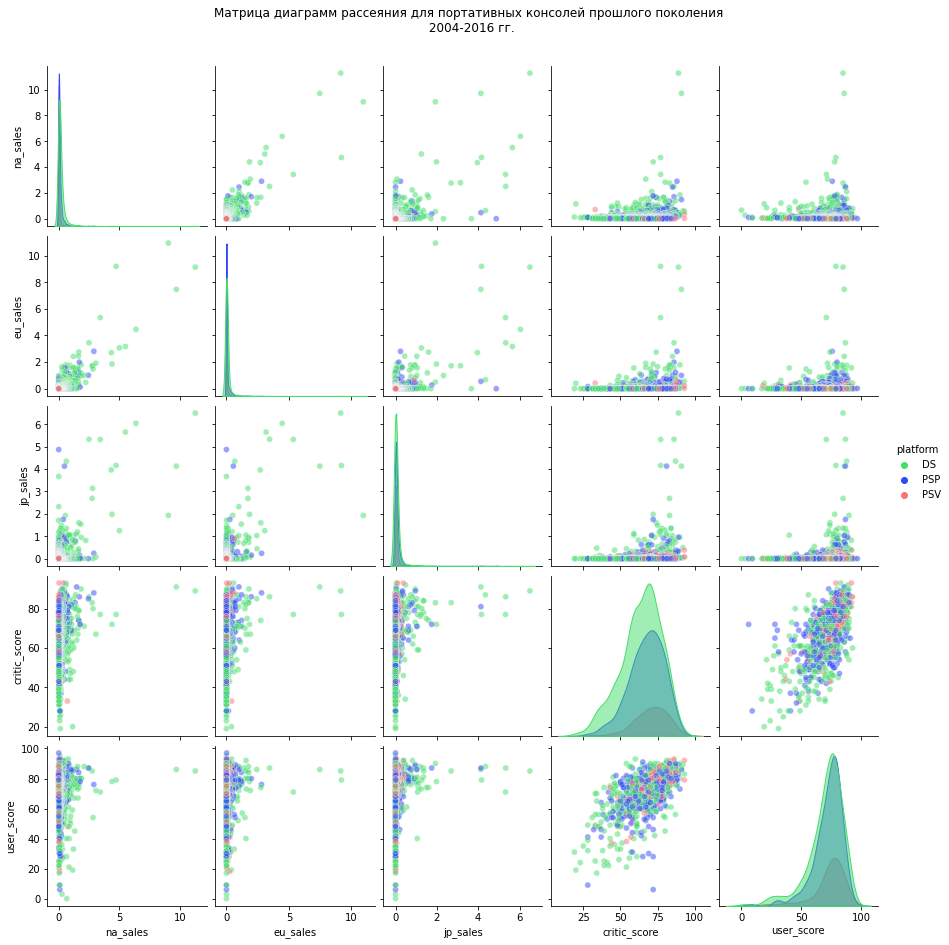

In [46]:
data_to_plot = main_df.loc[main_df['platform'].apply(lambda x: x in next_gen),
                           ['na_sales',
                        'eu_sales',
                        'jp_sales',
                        'critic_score',
                        'user_score',
                        'platform']].sort_values(by='platform')
my_color={'PS4':'#3148FA', 'XOne':'#45DE6B','WiiU':'#FA737B'}
matrix_plot = sns.pairplot(data_to_plot,
                           hue="platform", 
                           kind='scatter', 
                           hue_order = ['PS4','XOne','WiiU'],
                           diag_kind='auto', 
                           palette=my_color,
                           plot_kws=dict(alpha=0.5),
                           diag_kws=dict(alpha=0.8),
                          )
matrix_plot.fig.suptitle("Матрица диаграмм рассеяния для консолей текущего поколения \n 2012-2016 гг.", y = 1.05)
plt.show()

# В данных к этому блоку опять уберем супер популярную игру Wii Sport, мы поняли, что она огонь, фанаты Нинтенто не будут обижены

data_to_plot = main_df.query('sum_sales < 40').loc[main_df['platform'].apply(lambda x: x in past_gen),
                           ['na_sales',
                        'eu_sales',
                        'jp_sales',
                        'critic_score',
                        'user_score',
                        'platform']]
my_color={'PS3':'#3148FA', 'X360':'#45DE6B','Wii':'#FA737B'}
matrix_plot = sns.pairplot(data_to_plot,
                           hue="platform", 
                           kind='scatter', 
                           hue_order = ['PS3','X360','Wii'],
                           diag_kind='auto', 
                           palette=my_color,
                           plot_kws=dict(alpha=0.5),
                           diag_kws=dict(alpha=0.5),
                          )
matrix_plot.fig.suptitle("Матрица диаграмм рассеяния для консолей прошлого поколения \n 2005-2016 гг.", y = 1.05)
plt.show()

data_to_plot = main_df.loc[main_df['platform'].apply(lambda x: x in portable),
                           ['na_sales',
                        'eu_sales',
                        'jp_sales',
                        'critic_score',
                        'user_score',
                        'platform']]
my_color={'PSP':'#3148FA', 'DS':'#45DE6B','PSV':'#FA737B'}
matrix_plot = sns.pairplot(data_to_plot,
                           hue="platform", 
                           kind='scatter', 
                           hue_order = ['DS','PSP','PSV'],
                           diag_kind='auto', 
                           palette=my_color,
                           plot_kws=dict(alpha=0.5),
                           diag_kws=dict(alpha=0.5),
                          )
matrix_plot.fig.suptitle("Матрица диаграмм рассеяния для портативных консолей прошлого поколения \n 2004-2016 гг.", y = 1.05)
plt.show()

Из представленных матриц диаграмм рассеяния можно сделать вывод о том, что оценки критиков больше влияют на продажи, либо же больше соответсвуют реальности, ведь критики оценивают игру непредвзято (в идеале) и это подтверждается рынком, а так же наоборот, рынок видит оценки критиков и чаще покупает игру. Этот тренд прослеживается на всех платформах во все года.

Про оценки пользователей можно сказать, что на старых платформах их показатели в сравнении с продажами стремятся к оценкам критиков, однако на консолях нового поколения геймеры голодны до игр и вне зависимости от оценок пользоваттелей продажи у множества игр большие по сравнению с другоими играми в этом же поколении.

Посчитаем коэффициенты корреляции Пирсона и построим их визуализацию

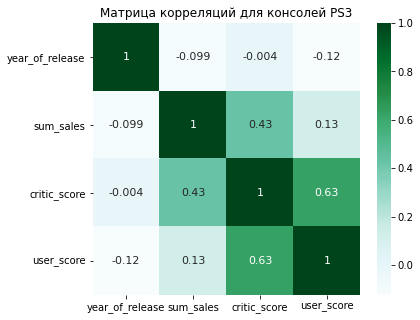

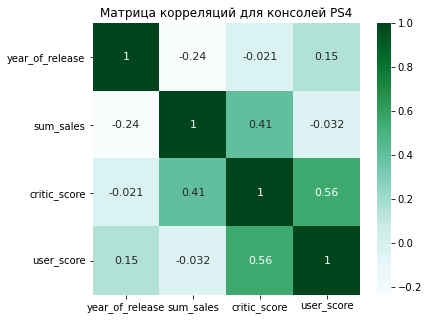

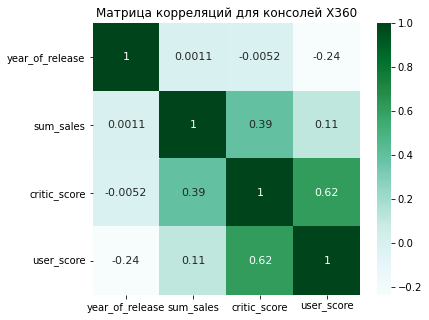

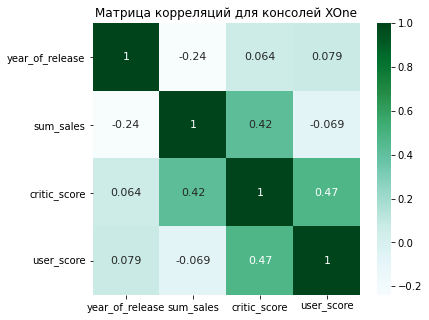

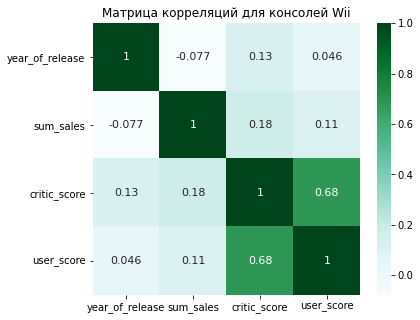

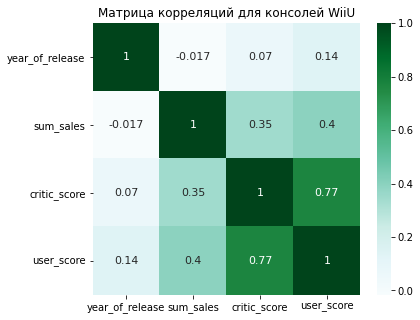

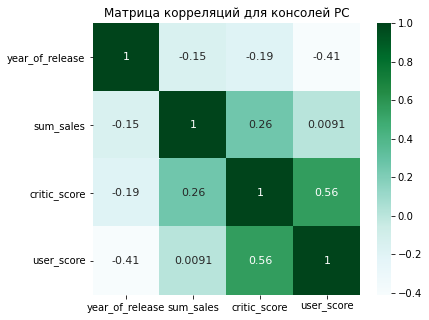

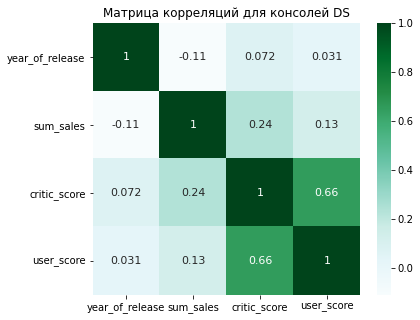

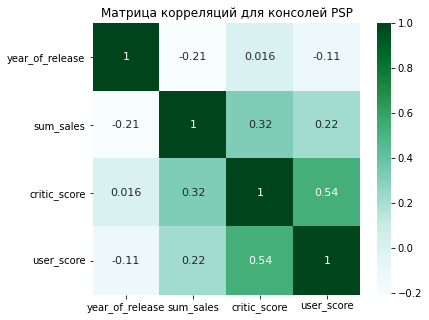

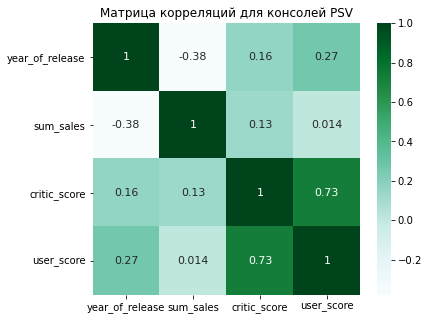

In [47]:
for i in all_platforms:
    corr = main_df.loc[main_df['platform']== i, 
                          ['year_of_release',
                           'sum_sales',
                           'critic_score',
                           'user_score']].corr()
    fig = plt.figure(figsize=(6, 5))
    sns.heatmap(corr, 
                annot=True, 
                annot_kws={"size": 11},
                cmap="BuGn"
               )
    plt.title(f"Матрица корреляций для консолей {i}")
    plt.show()

Из представленных матриц корреляций можно сделать следующие выводы:
* Для консолей Xbox и Playstation оценки критиков слабо, но влияют на суммарные продажи игр;
* Для консоли Wii оценки оценки критиков не влияют на суммарные продажи игр;
* Для всех консолей оценки пользователей почти не влияют на суммарные продажи игр;
* Оценки критиков и оценки пользователей коррелируют на спорных консолях заметно больше, чем на широко распространенных;
* На консолях нового поколения оценки пользователей имеют даже отрицательную корреляцию с продажами, это подтверждает наши выводы относительно игрового голода у геймеров на новых консолях.
----------------

Посмотрим на общее распределение игр по жанрам. 

In [48]:
df_genre_by_year = df.pivot_table(index=['genre','year_of_release'], 
                                  values='sum_sales',
                                 aggfunc = 'sum').reset_index()

In [49]:
df_genre_by_year['genre'].unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

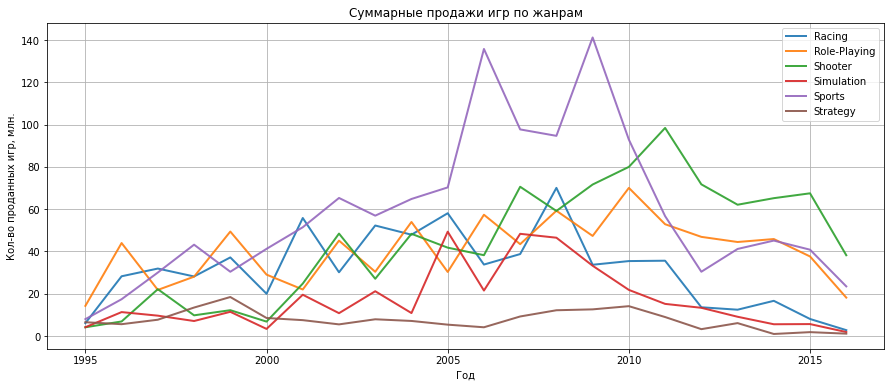

In [50]:
labels = ['Суммарные продажи игр по жанрам',
          'Год',
          'Кол-во проданных игр, млн.',
          ]
print_plt_lines(df_genre_by_year, 
                'genre', 
                'year_of_release', 
                'sum_sales', 
                [ 
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'
                ],
               labels)

In [51]:
df_sales_by_year['platform'].unique()

array(['DS', 'PC', 'PSP', 'X360', 'PS3', 'Wii', 'PSV', 'WiiU', 'PS4',
       'XOne'], dtype=object)

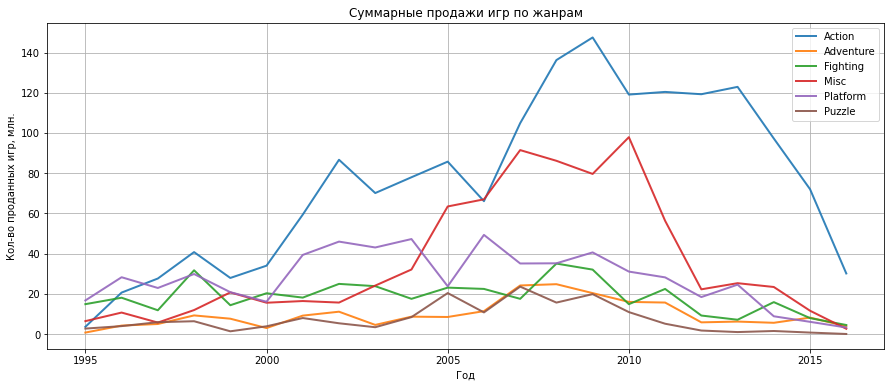

In [52]:
labels = ['Суммарные продажи игр по жанрам',
          'Год',
          'Кол-во проданных игр, млн.',
          ]
print_plt_lines(df_genre_by_year, 
                'genre', 
                'year_of_release', 
                'sum_sales', 
                [ 'Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
                ],
               labels)

Из графиков по годам можно выделить фаворитов - это 'Action','Sports', 'Role-Playing', 'Misc', 'Shooter', убедимся в этоп, построив Lolipop график по жанрам:

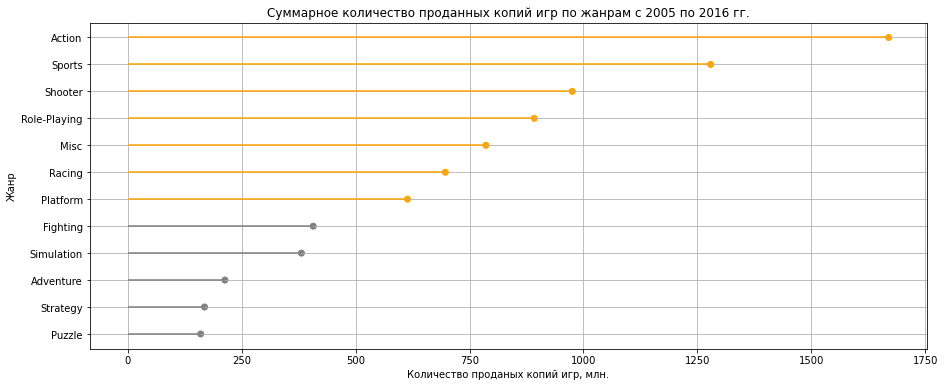

In [53]:
df_lolipop = df_genre_by_year.pivot_table(index = 'genre', 
                                          values = 'sum_sales', 
                                          aggfunc = 'sum').reset_index().sort_values(by = 'sum_sales')
labels = ['Суммарное количество проданных копий игр по жанрам с 2005 по 2016 гг.',
         'Количество проданых копий игр, млн.',
         'Жанр']
lolipop_plot(df_lolipop, 'sum_sales', 'genre',labels, color1='orange', color2='gray', color_lim=500)


Из графика видно, что игры категории "Action" имеют большой отрыв по продажам от остальных жанров, скорее всего такой скачек связан с тем, что это довольно обширный жанр и множество игр можно внести в эту категорию

Своей популярности жанр "Sports" обязан жуе рассмотренной ранее Wii Sport

Так же можно выделить жанры, не пользующиеся популярностью - файтинги, симуляторы, приключения, стратегии и пазлы, это совершенно точно нишевые жанры игр, к ним же можно было отнести платформеры, однако из-за своего разнообразия платформеры заметно вырываются вперед по продажам и находят своего пользователя

-------------------------

Сформируем портреты пользователей по регионам (NA, EU, JP), определим:

    Самые популярные платформы (топ-5). Опишите различия в долях продаж.
    Самые популярные жанры (топ-5). Поясните разницу.
    Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [54]:
df_lolipop

,genre,sum_sales
5,Puzzle,160.03
11,Strategy,168.54
1,Adventure,213.21
9,Simulation,381.13
2,Fighting,406.97
4,Platform,614.05
6,Racing,697.00
3,Misc,785.89
7,Role-Playing,891.95
8,Shooter,975.52


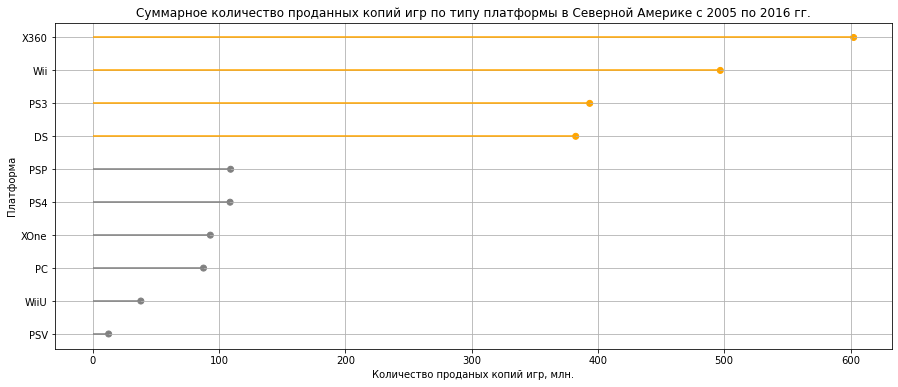

   index platform  na_sales
0      8     X360    602.47
1      6      Wii    496.90
2      2      PS3    393.49
3      0       DS    382.40
4      4      PSP    109.17
5      3      PS4    108.74
6      9     XOne     93.12
7      1       PC     87.71
8      7     WiiU     38.10
9      5      PSV     12.58


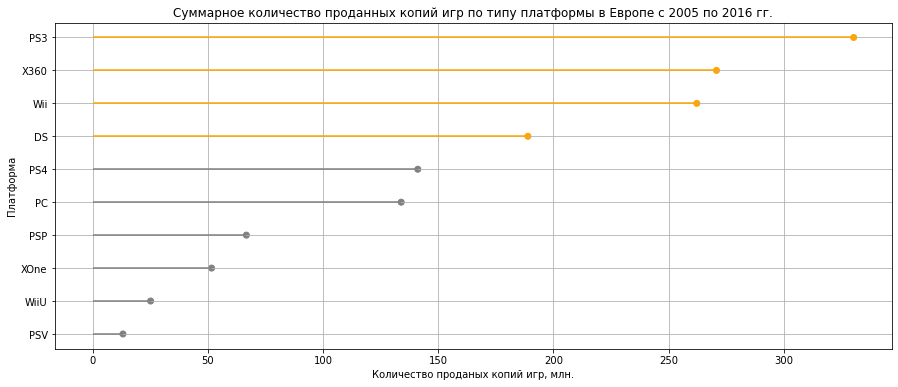

   index platform  eu_sales
0      2      PS3    330.29
1      8     X360    270.76
2      6      Wii    262.21
3      0       DS    188.89
4      3      PS4    141.09
5      1       PC    133.88
6      4      PSP     66.68
7      9     XOne     51.59
8      7     WiiU     25.13
9      5      PSV     13.12


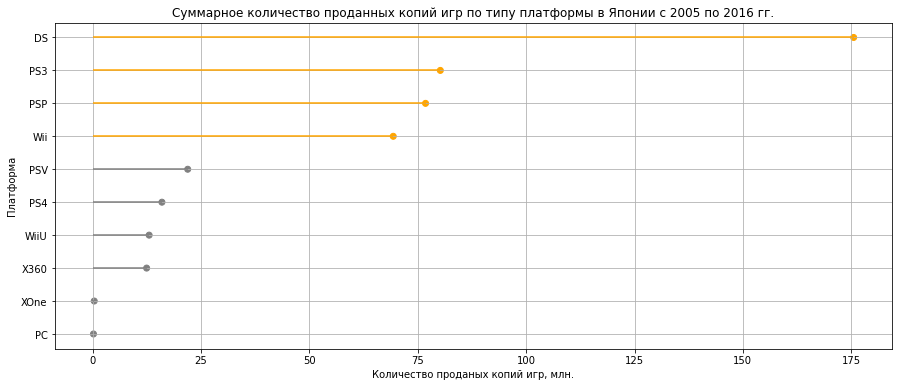

   index platform  jp_sales
0      0       DS    175.55
1      2      PS3     80.19
2      4      PSP     76.78
3      6      Wii     69.33
4      5      PSV     21.91
5      3      PS4     15.96
6      7     WiiU     13.01
7      8     X360     12.43
8      9     XOne      0.34
9      1       PC      0.17


In [55]:
df_lolipop_platform = main_df.pivot_table(index = 'platform', 
                                          values = ['na_sales', 'eu_sales','jp_sales'],
                                          aggfunc = 'sum').reset_index().sort_values(by = 'na_sales')
labels = ['Суммарное количество проданных копий игр по типу платформы в Северной Америке с 2005 по 2016 гг.',
         'Количество проданых копий игр, млн.',
         'Платформа']
lolipop_plot(df_lolipop_platform, 'na_sales', 'platform',labels, color_lim=150)
print(df_lolipop_platform[['platform','na_sales']].sort_values(by='na_sales', ascending = False).reset_index())
labels = ['Суммарное количество проданных копий игр по типу платформы в Европе с 2005 по 2016 гг.',
         'Количество проданых копий игр, млн.',
         'Платформа']
lolipop_plot(df_lolipop_platform, 'eu_sales', 'platform',labels, color_lim=150)
print(df_lolipop_platform[['platform','eu_sales']].sort_values(by='eu_sales', ascending = False).reset_index())

labels = ['Суммарное количество проданных копий игр по типу платформы в Японии с 2005 по 2016 гг.',
         'Количество проданых копий игр, млн.',
         'Платформа']
lolipop_plot(df_lolipop_platform, 'jp_sales', 'platform',labels, color_lim=50)
print(df_lolipop_platform[['platform','jp_sales']].sort_values(by='jp_sales', ascending = False).reset_index())


Явно видны отличия между разными рынками. В Японии любят японские консоли, в Европе любят все, но больше любят PS, в Америке отдают предпочтение Американским консолям Xbox, который в Японии практически не используют

-------------------

Рассмотрим распределение по жанрам в зависимости от выбранного региона:

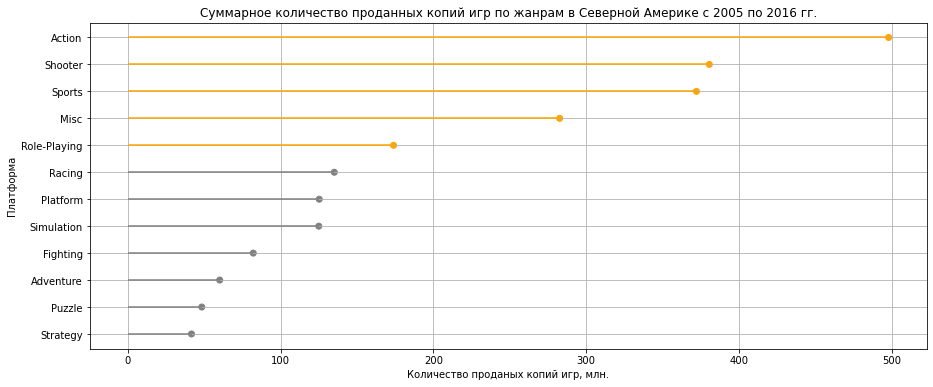

    index         genre  na_sales
0       0        Action    497.84
1       8       Shooter    380.47
2      10        Sports    372.07
3       3          Misc    282.58
4       7  Role-Playing    173.90
5       6        Racing    135.12
6       4      Platform    125.28
7       9    Simulation    124.99
8       2      Fighting     82.12
9       1     Adventure     60.16
10      5        Puzzle     48.43
11     11      Strategy     41.72


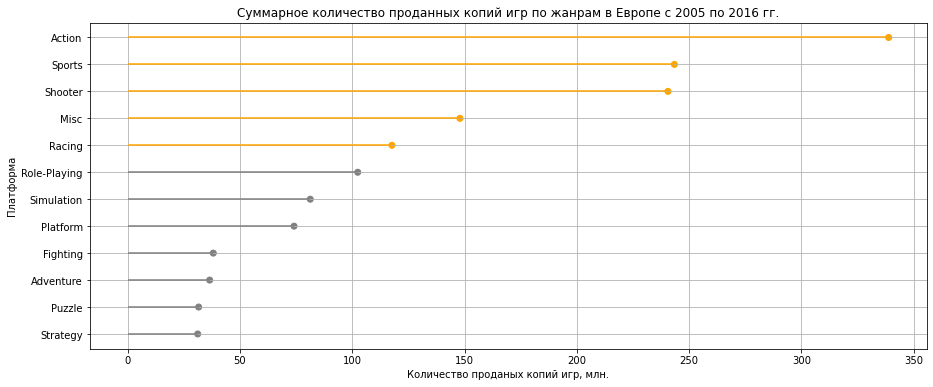

    index         genre  eu_sales
0       0        Action    338.88
1      10        Sports    243.46
2       8       Shooter    240.59
3       3          Misc    147.95
4       6        Racing    117.66
5       7  Role-Playing    102.43
6       9    Simulation     81.29
7       4      Platform     74.07
8       2      Fighting     38.10
9       1     Adventure     36.48
10      5        Puzzle     31.58
11     11      Strategy     31.15


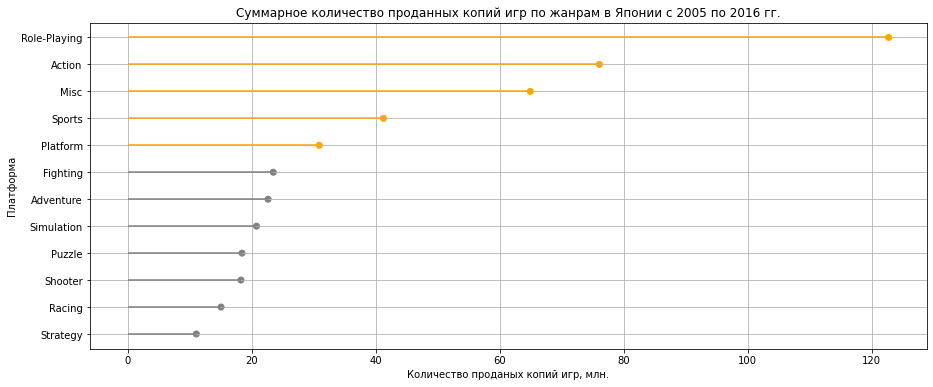

    index         genre  jp_sales
0       7  Role-Playing    122.76
1       0        Action     76.09
2       3          Misc     64.94
3      10        Sports     41.26
4       4      Platform     30.90
5       2      Fighting     23.48
6       1     Adventure     22.64
7       9    Simulation     20.77
8       5        Puzzle     18.44
9       8       Shooter     18.26
10      6        Racing     15.06
11     11      Strategy     11.07


In [56]:
df_lolipop_genre = main_df.pivot_table(index = 'genre', 
                                          values = ['na_sales', 'eu_sales','jp_sales'],
                                          aggfunc = 'sum').reset_index().sort_values(by = 'na_sales')
labels = ['Суммарное количество проданных копий игр по жанрам в Северной Америке с 2005 по 2016 гг.',
         'Количество проданых копий игр, млн.',
         'Платформа']
lolipop_plot(df_lolipop_genre, 'na_sales', 'genre',labels, color_lim=150)
print(df_lolipop_genre[['genre','na_sales']].sort_values(by='na_sales', ascending = False).reset_index())
labels = ['Суммарное количество проданных копий игр по жанрам в Европе с 2005 по 2016 гг.',
         'Количество проданых копий игр, млн.',
         'Платформа']
lolipop_plot(df_lolipop_genre, 'eu_sales', 'genre',labels, color_lim=110)
print(df_lolipop_genre[['genre','eu_sales']].sort_values(by='eu_sales', ascending = False).reset_index())

labels = ['Суммарное количество проданных копий игр по жанрам в Японии с 2005 по 2016 гг.',
         'Количество проданых копий игр, млн.',
         'Платформа']
lolipop_plot(df_lolipop_genre, 'jp_sales', 'genre',labels, color_lim=25)
print(df_lolipop_genre[['genre','jp_sales']].sort_values(by='jp_sales', ascending = False).reset_index())


Есть жанры, которые популярны во всем мире: Экшн, Спорт, РПГ, но есть и выбивающиеся значения, например в японии много любителей платформеров, это обусловлено широким распространением портативных консолей, на них чаще всего играют в платформеры

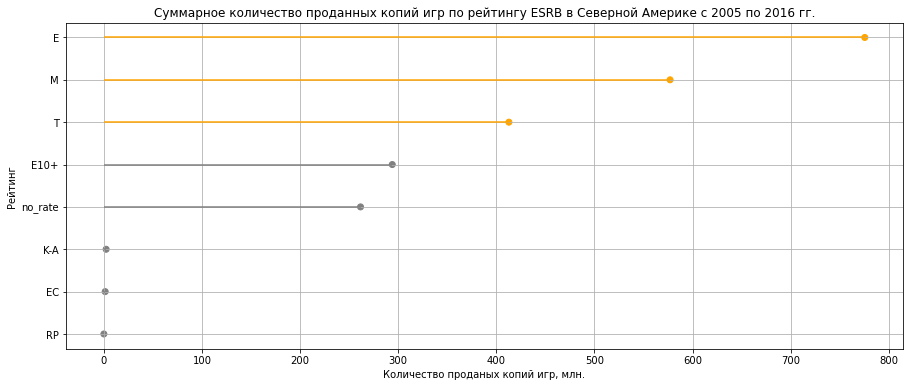

   index   rating  na_sales
0      0        E    775.57
1      4        M    577.11
2      6        T    412.83
3      1     E10+    293.95
4      7  no_rate    261.60
5      3      K-A      2.30
6      2       EC      1.32
7      5       RP      0.00


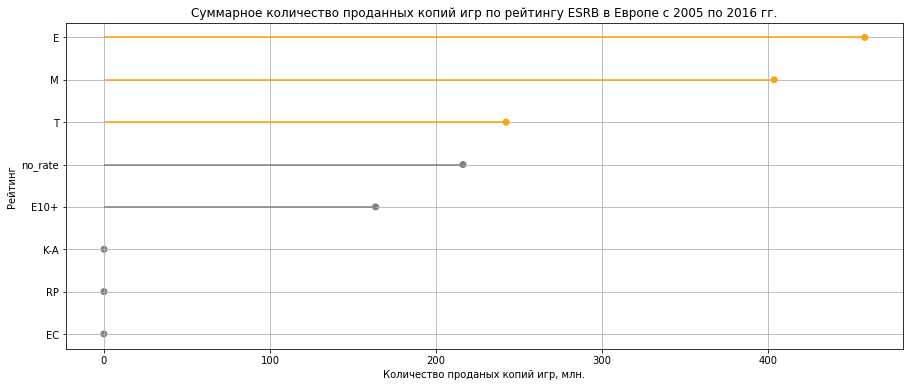

   index   rating  eu_sales
0      0        E    458.05
1      4        M    403.54
2      6        T    242.12
3      7  no_rate    216.16
4      1     E10+    163.58
5      3      K-A      0.11
6      5       RP      0.08
7      2       EC      0.00


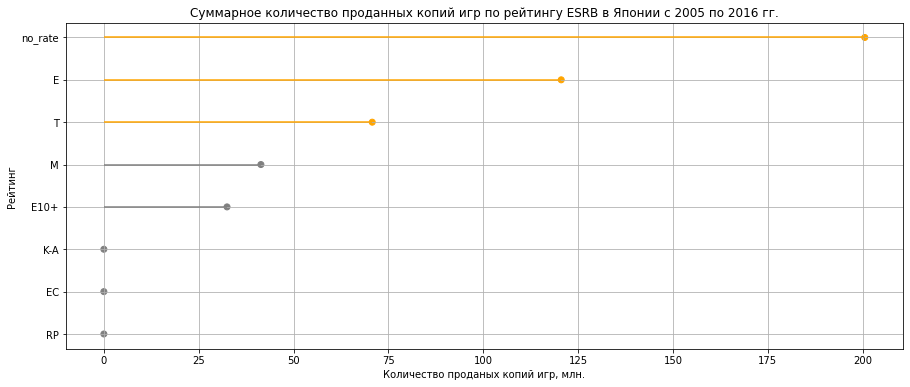

   index   rating  jp_sales
0      7  no_rate    200.55
1      0        E    120.54
2      6        T     70.73
3      4        M     41.39
4      1     E10+     32.46
5      5       RP      0.00
6      2       EC      0.00
7      3      K-A      0.00


In [57]:
df_lolipop_rating = main_df.pivot_table(index = 'rating', 
                                          values = ['na_sales', 'eu_sales','jp_sales'],
                                          aggfunc = 'sum').reset_index().sort_values(by = 'na_sales')
labels = ['Суммарное количество проданных копий игр по рейтингу ESRB в Северной Америке с 2005 по 2016 гг.',
         'Количество проданых копий игр, млн.',
         'Рейтинг']
lolipop_plot(df_lolipop_rating, 'na_sales', 'rating',labels, color_lim=400)
print(df_lolipop_rating[['rating','na_sales']].sort_values(by='na_sales', ascending = False).reset_index())
labels = ['Суммарное количество проданных копий игр по рейтингу ESRB в Европе с 2005 по 2016 гг.',
         'Количество проданых копий игр, млн.',
         'Рейтинг']
lolipop_plot(df_lolipop_rating, 'eu_sales', 'rating',labels, color_lim=230)
print(df_lolipop_rating[['rating','eu_sales']].sort_values(by='eu_sales', ascending = False).reset_index())

labels = ['Суммарное количество проданных копий игр по рейтингу ESRB в Японии с 2005 по 2016 гг.',
         'Количество проданых копий игр, млн.',
         'Рейтинг']
lolipop_plot(df_lolipop_rating, 'jp_sales', 'rating',labels, color_lim=50)
print(df_lolipop_rating[['rating','jp_sales']].sort_values(by='jp_sales', ascending = False).reset_index())

«E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году. Первоначально "K-A" ("Kids to Adults")

«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.

«M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории. 

Вышеперечисленные рейтинги игр - самые популярные во всем мире. В Японии преобладает no_rate - потому что там часто играют в локальные тайтлы, которые не оцен

### Вывод

* Были выделены данные, которые мы будем изучать для создания стратегии для заказчика
* Выделены самые успешные и провальные консоли
* Описано и визуализировано количество продаваемых игр по жанрам, платформам и регионам
* Посчитана корреляция между пользовательскими отзывами и продажами

Численные выводы и результаты приведены в итоговых выводах.

## Проверка статистических гипотез

Проверим следующие гипотезы:

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформируем нулевую гипотезу H0: Средние пользовательские оценки игр для платформ Xbox One и PC одинаковые 

Сформируем альтернативную гипотезу H1: Пользовательские оценки игр для платформ Xbox One и PC различаются 

In [58]:
main_df_stat = main_df.dropna()

In [59]:
alpha = 0.05

results = st.ttest_ind(main_df_stat.loc[main_df_stat['platform']=='XOne', 'user_score'],
                       main_df_stat.loc[main_df_stat['platform']=='PC', 'user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 7.969964593234807e-05
Отвергаем нулевую гипотезу


In [60]:
st.ttest_ind(main_df_stat.query('year_of_release > 2013').loc[main_df_stat['platform']=='XOne', 'user_score'],
             main_df_stat.query('year_of_release > 2013').loc[main_df_stat['platform']=='PC', 'user_score'])

Ttest_indResult(statistic=1.5261166141720202, pvalue=0.12817793652640008)

После проверки нулевой гипотезы можно сделать вывод о том, что пользовательские оценки игр на платформах Xbox One и PC - различаются.

Сформируем нулевую гипотезу H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые 

Сформируем нулевую гипотезу H1: Пользовательские рейтинги жанров Action и Sports различаются 

In [61]:
alpha = 0.05

results = st.ttest_ind(main_df_stat.loc[main_df_stat['genre']=='Action', 'user_score'],
                       main_df_stat.loc[main_df_stat['genre']=='Sports', 'user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 6.956332230053751e-09
Отвергаем нулевую гипотезу


После проверки нулевой гипотезы можно сделать вывод о том, что пользовательские оценки игр для жанров 'Action' и 'Sports' - различаются.

## Вывод по проделанной работе

### На этапе предобработки данных проведены следующие работы:

* На этапе предобработки данных были замечены значительные выбросы данных в столбцах количества проданных копий, но мы не стали избавляться от этих данных, так как они реальны и имеют важное значение в выборе товаров для заказчика.
* Пропуски в столбцах с оценками критиков и пользователей не заполнялись никакими значениями, потому что если заполнить их средними или медианными, то мы получим некорректную статистику при соотношении пользовательских оценок и продаж игр, ведь мы можем оценить средне как плохую игру так и очень хорошую, но оценок которой просто не было в выборке.
* В графе года выпуска игры пропуски были заменены на медианные значения в соответствии с платформой

Данные чистые, на этапе предобработки понадобилось минимальное количество манипуляций.


### Анализ данных:

Для анализа данных были выбраны портативные и стационарные консоли прошлого и текущего поколения:

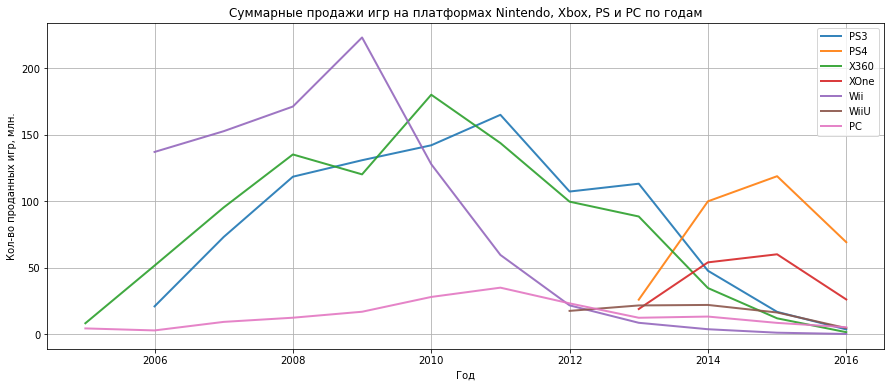

In [62]:
labels = ['Суммарные продажи игр на платформах Nintendo, Xbox, PS и PC по годам',
          'Год',
          'Кол-во проданных игр, млн.',
          ]
print_plt_lines(df_sales_by_year.query('year_of_release >=2005'), 
                'platform', 
                'year_of_release', 
                'sum_sales', 
                [ 'PS3', 'PS4', 'X360','XOne', 'Wii', 'WiiU', 'PC',
                ],
               labels)

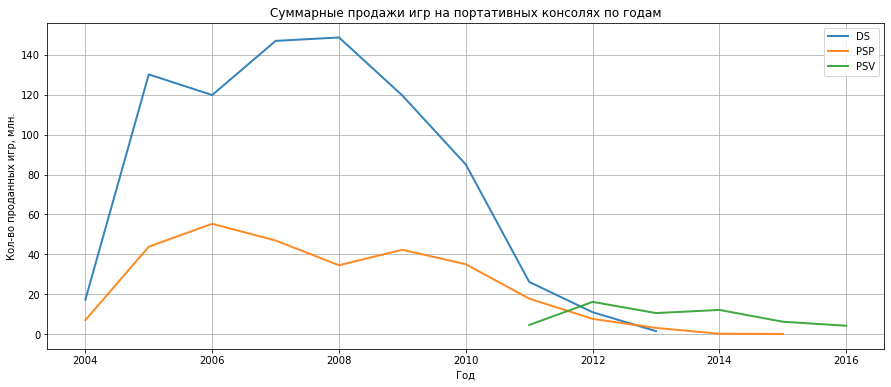

In [63]:
labels = ['Суммарные продажи игр на портативных консолях по годам',
          'Год',
          'Кол-во проданных игр, млн.',
          ]
print_plt_lines(df_sales_by_year, 
                'platform', 
                'year_of_release', 
                'sum_sales', 
                [ 'DS', 'PSP', 'PSV',
                ],
               labels)

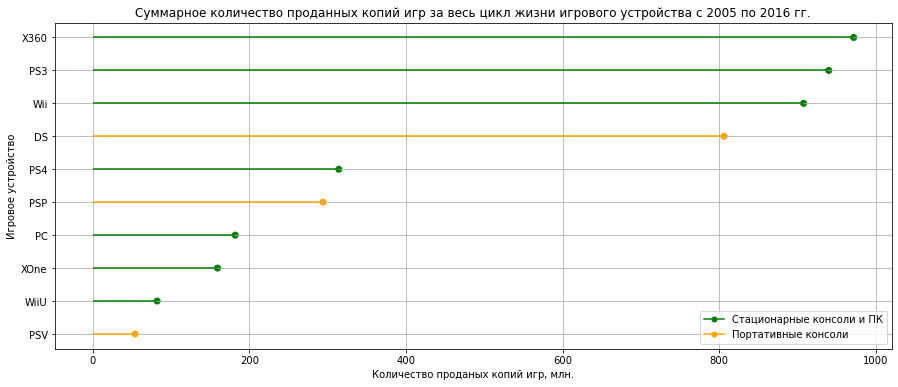

In [64]:
df_lolipop = df_sales_by_year.pivot_table(index = 'platform', 
                                          values = 'sum_sales', 
                                          aggfunc = 'sum').reset_index().sort_values(by = 'sum_sales')
df_lolipop['portable'] = 0
df_lolipop.loc[df_lolipop['platform'].apply(lambda x:x in [ 'DS', 'PSP', 'PSV']), 'portable'] = 1

my_range=range(1,len(df_lolipop.index)+1)
my_color=np.where(df_lolipop ['portable'] == 1, 'orange', 'green')
fig = plt.figure(figsize=(15, 6)) 
plt.hlines(y=my_range, xmin=0, xmax=df_lolipop['sum_sales'], color=my_color)
plt.scatter(df_lolipop['sum_sales'], my_range, color=my_color, alpha=1)
 

plt.yticks(my_range, df_lolipop['platform'])
plt.title("Суммарное количество проданных копий игр за весь цикл жизни игрового устройства с 2005 по 2016 гг.")
plt.xlabel('Количество проданых копий игр, млн.')
plt.ylabel('Игровое устройство')
plt.grid()

# Делаем легенду вручную, введем обозначения для линий

orange_line = mlines.Line2D([], [], color='orange', marker='o',
                          markersize=5, label='Портативные консоли')
green_line = mlines.Line2D([], [], color='green', marker='o',
                          markersize=5, label='Стационарные консоли и ПК')
plt.legend(handles=[green_line,orange_line],loc=4)
plt.show()

Из представленного графика видно, что популярностью Большей популярностью пользовалась консоль xbox 360, однако в текущем поколении лидирует PS4

Так же исходя из количества продаж игр можно сделать вывод, что выгоднее продавать игры на консоли Nintendo и на стационарные консоли PS и Xbox, однако консоль нинтендо WiiU текущего поколения не пользуется популярностью, скорее всего у нее были проблемы на запуске и отсутствуют систем-селлеры, ритейлеру нужно смотреть на эти условия при планировании продаж.

Портативная консоль PSVita скорее всего столкнулась с теми же проблемами, что и WiiU

PC - платформа пиратства, игры на ПК в физическом ритейле лучше продавать в меньшем количестве.

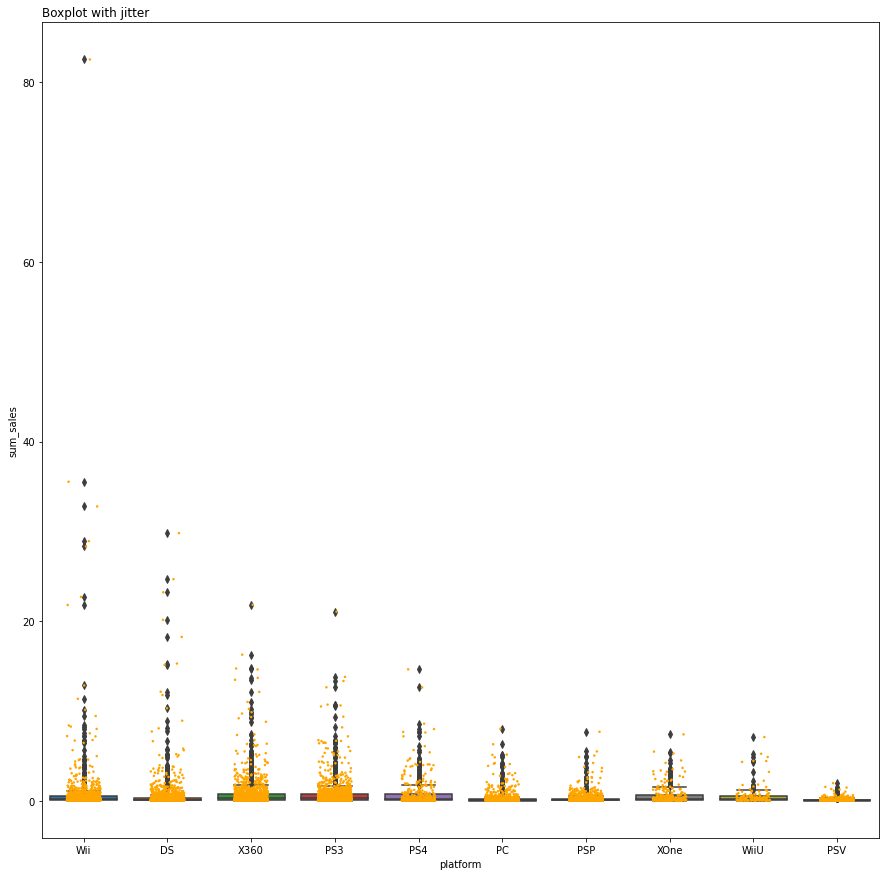

In [65]:
fig = plt.figure(figsize=(15, 15)) 
ax = sns.boxplot(x='platform', y='sum_sales', data=main_df)
ax = sns.stripplot(x='platform', y='sum_sales', data=main_df, color="orange", jitter=0.2, size=2.5)
plt.title("Boxplot with jitter", loc="left")
plt.show()

Из этого графика с ящиками с усами хорошо видно, что бОльшая часть игр продается очень малым тиражем, и лишь малая часть - больше 3 млн. копий, это обусловлено тем, что основная масса игр - это мультиплатформенные малобюджетные или среднебюджетные игры. Действительно большие продажи у игр - систем селлеров и крупнобюджеттных мультиплатформенных серий, их стоит закупать для продажи в бОльшем количестве.

--------
Списки игр по платформам с количеством продаж по платформам трех производителей из прошлого поколения консолей:

In [66]:
df.loc[(df['platform']=='Wii')&(df['sum_sales']>3),['name','sum_sales', 'genre']]

,name,sum_sales,genre
0,Wii Sports,82.54,Sports
2,Mario Kart Wii,35.52,Racing
3,Wii Sports Resort,32.77,Sports
7,Wii Play,28.91,Misc
8,New Super Mario Bros. Wii,28.32,Platform
13,Wii Fit,22.70,Sports
15,Wii Fit Plus,21.80,Sports
39,Super Smash Bros. Brawl,12.84,Fighting
49,Super Mario Galaxy,11.35,Platform
61,Just Dance 3,10.12,Misc


In [67]:
df.loc[(df['platform']=='DS')&(df['sum_sales']>3),['name','sum_sales','genre']]

,name,sum_sales,genre
6,New Super Mario Bros.,29.80,Platform
10,Nintendogs,24.67,Simulation
11,Mario Kart DS,23.21,Racing
19,Brain Age: Train Your Brain in Minutes a Day,20.14,Misc
20,Pokemon Diamond/Pokemon Pearl,18.24,Role-Playing
26,Brain Age 2: More Training in Minutes a Day,15.28,Puzzle
27,Pokemon Black/Pokemon White,15.13,Role-Playing
43,Animal Crossing: Wild World,12.14,Simulation
46,Pokemon HeartGold/Pokemon SoulSilver,11.77,Action
59,Super Mario 64,10.30,Platform


На консоли Wii явно преобладает спортивная тематика игр, и, исходя из названий игр - музыкальная, это обусловлено возможностями самой консоли, на консоли DS же преобладают платформеры и РПГ, это так же обусловлено самой консолью, в портативном режиме удобно играть в платформеры и японские ролевые игры

In [68]:
df.loc[(df['platform']=='PS3')&(df['sum_sales']>3),['name','sum_sales','genre']]

,name,sum_sales,genre
16,Grand Theft Auto V,21.05,Action
34,Call of Duty: Black Ops II,13.79,Shooter
37,Call of Duty: Modern Warfare 3,13.33,Shooter
41,Call of Duty: Black Ops,12.63,Shooter
54,Gran Turismo 5,10.70,Racing
55,Call of Duty: Modern Warfare 2,10.61,Shooter
57,Grand Theft Auto IV,10.50,Action
69,Call of Duty: Ghosts,9.36,Shooter
81,FIFA Soccer 13,8.17,Action
104,Battlefield 3,7.17,Shooter


In [69]:
df.loc[(df['platform']=='X360')&(df['sum_sales']>3),['name','sum_sales','genre']]

,name,sum_sales,genre
14,Kinect Adventures!,21.82,Misc
23,Grand Theft Auto V,16.27,Action
29,Call of Duty: Modern Warfare 3,14.73,Shooter
32,Call of Duty: Black Ops,14.62,Shooter
35,Call of Duty: Black Ops II,13.68,Shooter
36,Call of Duty: Modern Warfare 2,13.47,Shooter
44,Halo 3,12.12,Shooter
51,Grand Theft Auto IV,11.00,Action
60,Call of Duty: Ghosts,10.24,Shooter
64,Halo: Reach,9.86,Shooter


На консолях PS и Xbox преобладают мультиплатформенные шутеры/спортиные симуляторы, а так же эксклюзивные тайтлы

Вышеперечисленные серии игр для новых поколений консолей стоит покупать в бОльшем количестве копий для дальнейшей реализации

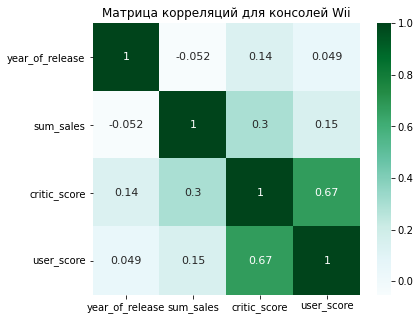

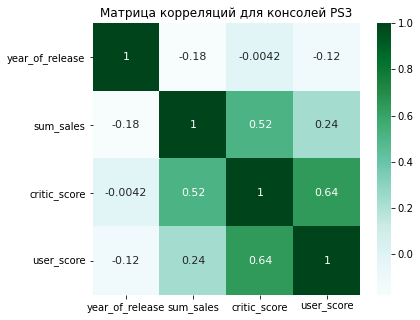

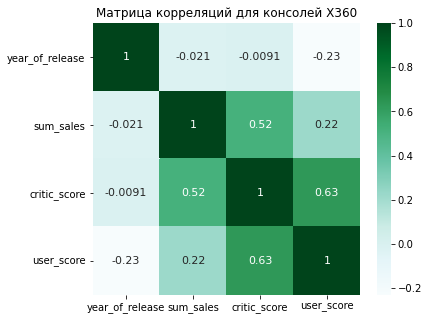

In [70]:
for i in past_gen:
    corr = main_df_pg.loc[main_df_pg['platform'] == i, 
                          ['year_of_release',
                           'sum_sales',
                           'critic_score',
                           'user_score']].corr()
    fig = plt.figure(figsize=(6, 5))
    sns.heatmap(corr, 
                annot=True, 
                annot_kws={"size": 11},
                cmap="BuGn"
               )
    plt.title(f"Матрица корреляций для консолей {i}")
    plt.show()

Из представленных матриц корелляций можно сделать вывод, что оценки пользователей мало влияют на итоговое количество проданных копий игры, а оценки критиков влияют только на консолях Xbox и PS

Пользователи консоли от Nintendo любят свои серии игр и покупают их в любом случае, даже при отрицательных отзывах критиков

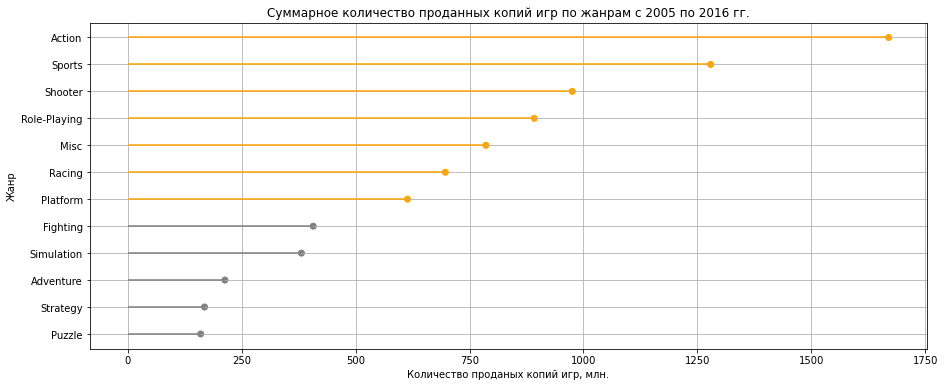

In [71]:
df_lolipop = df_genre_by_year.pivot_table(index = 'genre', 
                                          values = 'sum_sales', 
                                          aggfunc = 'sum').reset_index().sort_values(by = 'sum_sales')
labels = ['Суммарное количество проданных копий игр по жанрам с 2005 по 2016 гг.',
         'Количество проданых копий игр, млн.',
         'Жанр']
lolipop_plot(df_lolipop, 'sum_sales', 'genre',labels, color1='orange', color2='gray', color_lim=500)


На графике выделены самые продаваемые жанры во всем мире, так же видны жанры "на любителя" со своей узкой аудиторией, это может помочь в определении приоритетности развертывания рекламных компаний при близких друг к другу релизах 

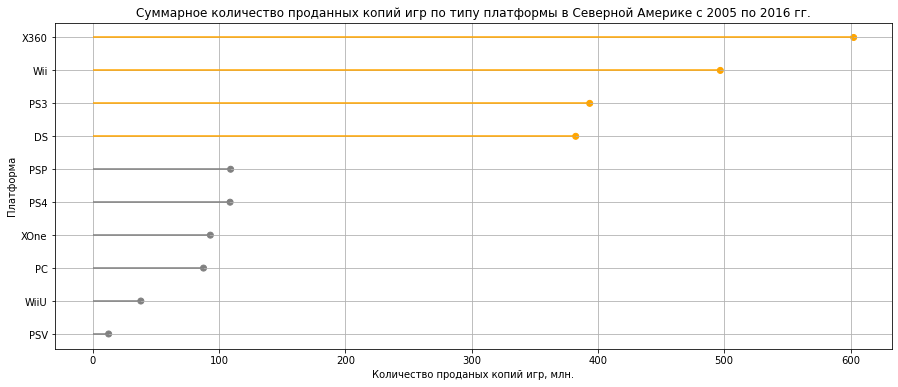

   index platform  na_sales
0      8     X360    602.47
1      6      Wii    496.90
2      2      PS3    393.49
3      0       DS    382.40
4      4      PSP    109.17
5      3      PS4    108.74
6      9     XOne     93.12
7      1       PC     87.71
8      7     WiiU     38.10
9      5      PSV     12.58


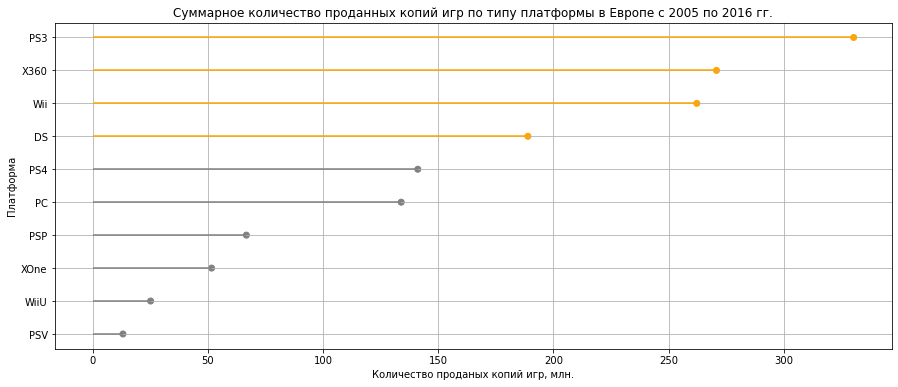

   index platform  eu_sales
0      2      PS3    330.29
1      8     X360    270.76
2      6      Wii    262.21
3      0       DS    188.89
4      3      PS4    141.09
5      1       PC    133.88
6      4      PSP     66.68
7      9     XOne     51.59
8      7     WiiU     25.13
9      5      PSV     13.12


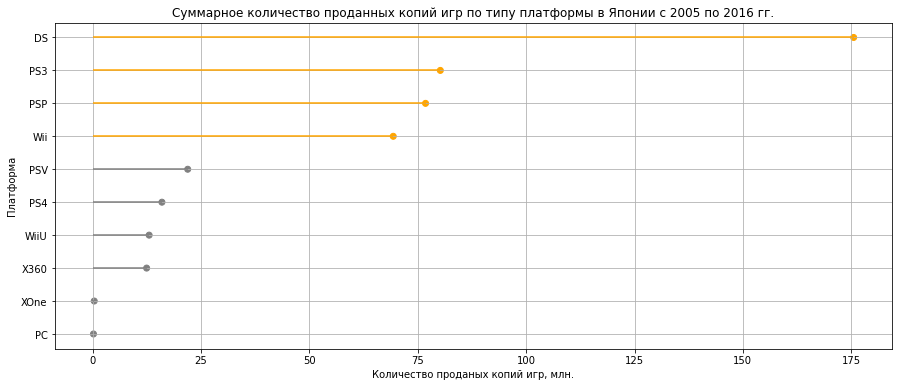

   index platform  jp_sales
0      0       DS    175.55
1      2      PS3     80.19
2      4      PSP     76.78
3      6      Wii     69.33
4      5      PSV     21.91
5      3      PS4     15.96
6      7     WiiU     13.01
7      8     X360     12.43
8      9     XOne      0.34
9      1       PC      0.17


In [72]:
df_lolipop_platform = main_df.pivot_table(index = 'platform', 
                                          values = ['na_sales', 'eu_sales','jp_sales'],
                                          aggfunc = 'sum').reset_index().sort_values(by = 'na_sales')
labels = ['Суммарное количество проданных копий игр по типу платформы в Северной Америке с 2005 по 2016 гг.',
         'Количество проданых копий игр, млн.',
         'Платформа']
lolipop_plot(df_lolipop_platform, 'na_sales', 'platform',labels, color_lim=150)
print(df_lolipop_platform[['platform','na_sales']].sort_values(by='na_sales', ascending = False).reset_index())
labels = ['Суммарное количество проданных копий игр по типу платформы в Европе с 2005 по 2016 гг.',
         'Количество проданых копий игр, млн.',
         'Платформа']
lolipop_plot(df_lolipop_platform, 'eu_sales', 'platform',labels, color_lim=150)
print(df_lolipop_platform[['platform','eu_sales']].sort_values(by='eu_sales', ascending = False).reset_index())

labels = ['Суммарное количество проданных копий игр по типу платформы в Японии с 2005 по 2016 гг.',
         'Количество проданых копий игр, млн.',
         'Платформа']
lolipop_plot(df_lolipop_platform, 'jp_sales', 'platform',labels, color_lim=50)
print(df_lolipop_platform[['platform','jp_sales']].sort_values(by='jp_sales', ascending = False).reset_index())


В америке стоит отдать предпочтение играм для консолей Xbox, эта консоль пользуется там большей популярностью

В Европе отдают предпочтение консолям PS, но и Xbox и Wii не сильно отстают.

В Японии можно в целом отказать от игр для Xbox и PC

-------------------

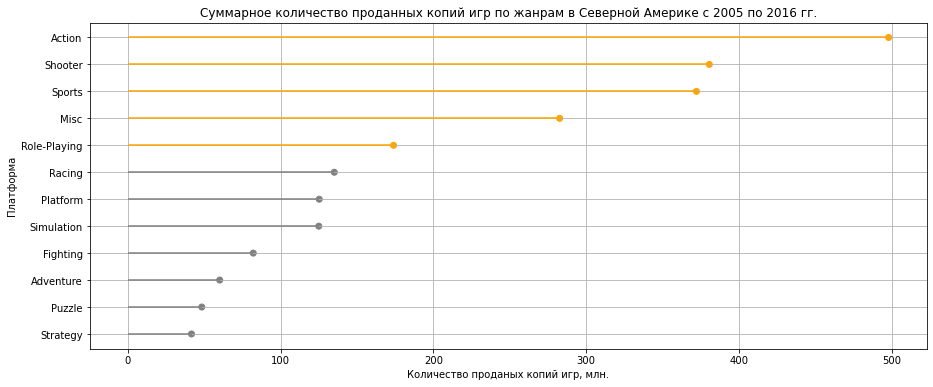

    index         genre  na_sales
0       0        Action    497.84
1       8       Shooter    380.47
2      10        Sports    372.07
3       3          Misc    282.58
4       7  Role-Playing    173.90
5       6        Racing    135.12
6       4      Platform    125.28
7       9    Simulation    124.99
8       2      Fighting     82.12
9       1     Adventure     60.16
10      5        Puzzle     48.43
11     11      Strategy     41.72


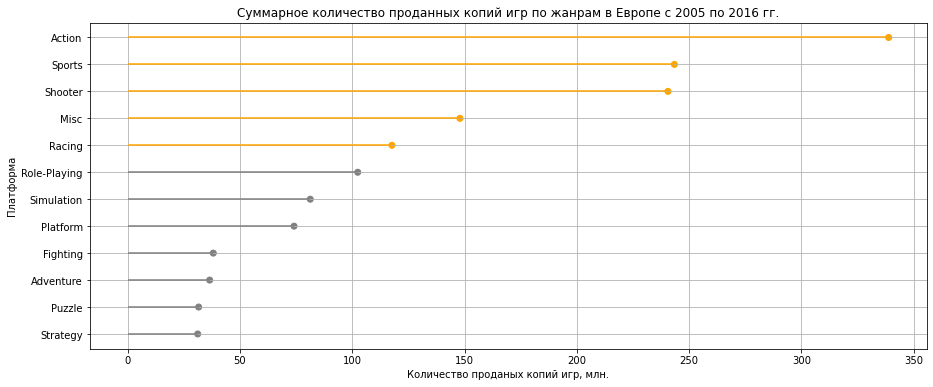

    index         genre  eu_sales
0       0        Action    338.88
1      10        Sports    243.46
2       8       Shooter    240.59
3       3          Misc    147.95
4       6        Racing    117.66
5       7  Role-Playing    102.43
6       9    Simulation     81.29
7       4      Platform     74.07
8       2      Fighting     38.10
9       1     Adventure     36.48
10      5        Puzzle     31.58
11     11      Strategy     31.15


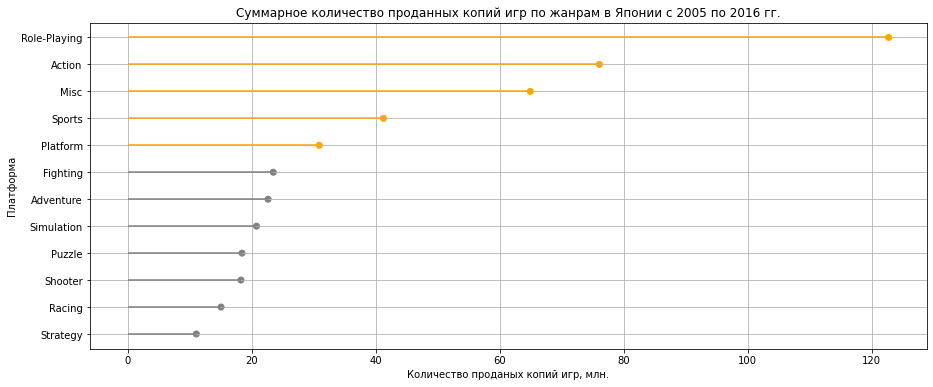

    index         genre  jp_sales
0       7  Role-Playing    122.76
1       0        Action     76.09
2       3          Misc     64.94
3      10        Sports     41.26
4       4      Platform     30.90
5       2      Fighting     23.48
6       1     Adventure     22.64
7       9    Simulation     20.77
8       5        Puzzle     18.44
9       8       Shooter     18.26
10      6        Racing     15.06
11     11      Strategy     11.07


In [73]:
df_lolipop_genre = main_df.pivot_table(index = 'genre', 
                                          values = ['na_sales', 'eu_sales','jp_sales'],
                                          aggfunc = 'sum').reset_index().sort_values(by = 'na_sales')
labels = ['Суммарное количество проданных копий игр по жанрам в Северной Америке с 2005 по 2016 гг.',
         'Количество проданых копий игр, млн.',
         'Платформа']
lolipop_plot(df_lolipop_genre, 'na_sales', 'genre',labels, color_lim=150)
print(df_lolipop_genre[['genre','na_sales']].sort_values(by='na_sales', ascending = False).reset_index())
labels = ['Суммарное количество проданных копий игр по жанрам в Европе с 2005 по 2016 гг.',
         'Количество проданых копий игр, млн.',
         'Платформа']
lolipop_plot(df_lolipop_genre, 'eu_sales', 'genre',labels, color_lim=110)
print(df_lolipop_genre[['genre','eu_sales']].sort_values(by='eu_sales', ascending = False).reset_index())

labels = ['Суммарное количество проданных копий игр по жанрам в Японии с 2005 по 2016 гг.',
         'Количество проданых копий игр, млн.',
         'Платформа']
lolipop_plot(df_lolipop_genre, 'jp_sales', 'genre',labels, color_lim=25)
print(df_lolipop_genre[['genre','jp_sales']].sort_values(by='jp_sales', ascending = False).reset_index())


Есть жанры, которые популярны во всем мире: Экшн, Спорт, РПГ, но есть и выбивающиеся значения, например в японии много любителей платформеров, это обусловлено широким распространением портативных консолей, на них чаще всего играют в платформеры

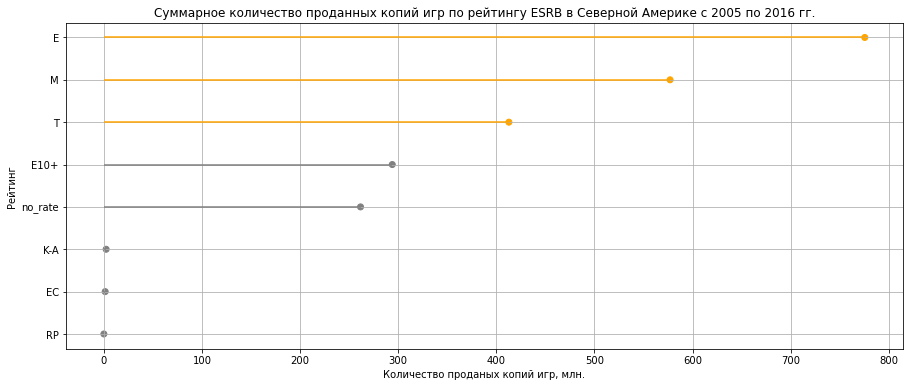

   index   rating  na_sales
0      0        E    775.57
1      4        M    577.11
2      6        T    412.83
3      1     E10+    293.95
4      7  no_rate    261.60
5      3      K-A      2.30
6      2       EC      1.32
7      5       RP      0.00


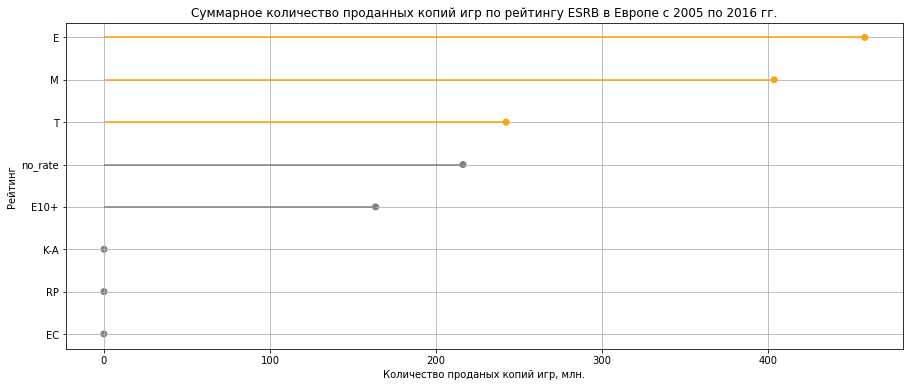

   index   rating  eu_sales
0      0        E    458.05
1      4        M    403.54
2      6        T    242.12
3      7  no_rate    216.16
4      1     E10+    163.58
5      3      K-A      0.11
6      5       RP      0.08
7      2       EC      0.00


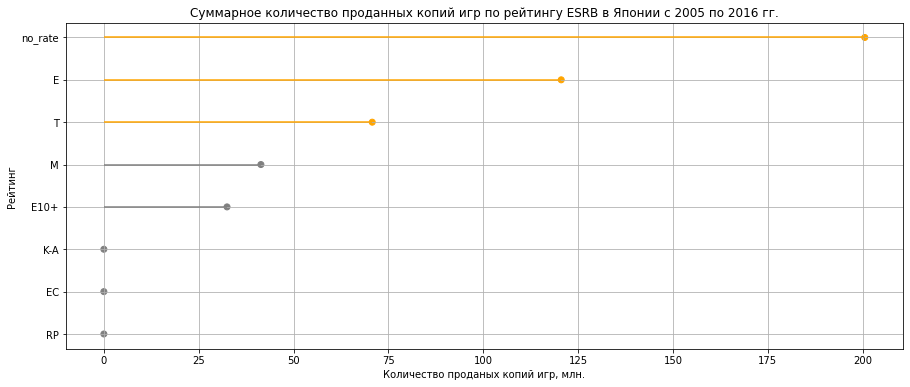

   index   rating  jp_sales
0      7  no_rate    200.55
1      0        E    120.54
2      6        T     70.73
3      4        M     41.39
4      1     E10+     32.46
5      5       RP      0.00
6      2       EC      0.00
7      3      K-A      0.00


In [74]:
df_lolipop_rating = main_df.pivot_table(index = 'rating', 
                                          values = ['na_sales', 'eu_sales','jp_sales'],
                                          aggfunc = 'sum').reset_index().sort_values(by = 'na_sales')
labels = ['Суммарное количество проданных копий игр по рейтингу ESRB в Северной Америке с 2005 по 2016 гг.',
         'Количество проданых копий игр, млн.',
         'Рейтинг']
lolipop_plot(df_lolipop_rating, 'na_sales', 'rating',labels, color_lim=400)
print(df_lolipop_rating[['rating','na_sales']].sort_values(by='na_sales', ascending = False).reset_index())
labels = ['Суммарное количество проданных копий игр по рейтингу ESRB в Европе с 2005 по 2016 гг.',
         'Количество проданых копий игр, млн.',
         'Рейтинг']
lolipop_plot(df_lolipop_rating, 'eu_sales', 'rating',labels, color_lim=230)
print(df_lolipop_rating[['rating','eu_sales']].sort_values(by='eu_sales', ascending = False).reset_index())

labels = ['Суммарное количество проданных копий игр по рейтингу ESRB в Японии с 2005 по 2016 гг.',
         'Количество проданых копий игр, млн.',
         'Рейтинг']
lolipop_plot(df_lolipop_rating, 'jp_sales', 'rating',labels, color_lim=50)
print(df_lolipop_rating[['rating','jp_sales']].sort_values(by='jp_sales', ascending = False).reset_index())

По возрастным рейтингам делать какие-то выводы не стоит, потому что в данном случае статистика не корректна из-за Больше количества игр с определенными возрастными рейтингами

### Проверка гипотез

1. H0: Средние пользовательские оценки игр для платформ Xbox One и PC одинаковые 

После проверки нулевой гипотезы можно сделать вывод о том, что пользовательские оценки игр на платформах Xbox One и PC - различаются.

2. H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые 

После проверки нулевой гипотезы можно сделать вывод о том, что пользовательские оценки игр для жанров 'Action' и 'Sports' - различаются.

### Итоговый вывод

Для формирования плана продаж и рекламных компаний сети магазинов заказчика необходимо основываться на привязке к геолокации магазина, в рассмотренных регионах есть явная привязка пользователей к определенному жанру игр и к определенных платформам

Так же необходимо смотреть на политику компаний-производителей консолей относительно своих продуктов, при анализе данных были выявлены явно неудачные устройства, продажи игр для которых были малы и быстро шли на спад, уделять время и средства таким играм стоит в меньшей степени.

Выявлен список игр с максимальными продажами по каждой консоли, серии игр из данного списка можно продвигать и продавать в магазинах в бол